<div><center>
<table><tr>
<td>
<img src="images/Embraer_logo.png" alt="Empresa Brasileira de Aeronáutica (Embraer)" style="width: 300px;"/>
    </td>
<td>
<img src="images/ITA_logo.png" alt="Instituto Tecnológico da Aeronáutica (ITA)" style="width: 300px;"/>
    </td>
    </tr></table
</center></div>

# EMBRAER | ITA

## ENGENHARIA AERONÁUTICA E MECÂNICA - PEE 30

### AC-701 : SISTEMAS PROPULSIVOS - PROF. LACAVA

### Autores:

* Camilla Santos
* Eloi Antonio
* Gabriel Henrique
* Jonas Degrave
* Lucas Schroeder
* Matheus Monteverde
* Orlando Gabriel
* Rafael Bayão

---

## Exercício 1: Montagem do Simulador

* Matheus Monteverde
* Rafael Bayão

### Estratégia para criação do simulador

O simulador foi montado a partir de uma arquitetura de Programação Orientada a Objetos. Dessa forma, foram modelados processos que são herdados pelos componentes e esses são utilizados pelos motores a medida da necessidade. Os a lista de objetos e suas funções podem ser visualizados abaixo:

Processos térmicos: cada processo armazena as propriedades adequadas para formulação de suas transformações.

* ThermalProcess: Classe principal que implementa métodos genéricos isentrópicos e é herdada pelas demais.
* StaticThermalProcess: implementa métodos para processos com entrada e saída com velocidades desprezíveis para o gás.
* SpeedInThermalProcess: implementa métodos para processos com entrada com velocidade considerável e saída com velocidade desprezível para o gás.
* SpeedOutThermalProcess: implementa métodos para processos com entrada com velocidade desprezível e saída com velocidade consideravel para o gás.

Componentes: cada componente herda um processo térmico adequado ao seu funcionamento implementa as equações necessárias. Os valores de entrada são armazenados e os de saída calculados ao serem invocados. Por fim, implementam métodos para variar a rotação e resumir todos os parametros inclusos.

* Diffuser_Adiab
* Nozzle_Adiab
* Compressor
* Fan
* Turbine
* FanTurbine
* FreeTurbine
* CombustionChamber

Motores: cada motor instancia sequencialmente os componentes necessários para o funcionamento e implementa métodos para ajustar globalmente a rotação e fornecer todas as propriedades de entrada e saída dos componentes e do próprio motor.

* TurboJet
* TurboFan
* TurboProp

### Exemplos resolvidos

#### Importação de pacotes

In [2]:
import model_reference as mf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

#### Exemplo 2.1: TurboJet

Informações do exercício:

Calcular o empuxo específico e consumo específico (TSFC) para um motor turbojato operando a Mach 0,85 e a 12.200 m (Pa = 18,75kPa e Ta = 216,7 K). Usar os dados abaixo para eficiências e razões de calor específico.

| Componente | Eficiência Adiabática| $\gamma$            |
|------------|----------------------|-------------------  |
| difusor    | 0,97                 | 1,40                |
| compressor | 0,85                 | 1,37                |
| combustão  | 1,00                 | 1,35                |
| turbina    | 0.90                 | 1,33                |
| bocal      | 0,98                 | 1,36                |

Dados operacionais


| Dados operacionais:                           | Valor             |
|-----------------------------------------------|-------------------|
| Razão de Pressão no compressor                | 30                |
| Temperatura na sáida da câmara de combustão   | 1600 K            |
| Poder Calorífico Inferior do Combustível      | 45000 kJ/kg       |
| R Médio                                       | 288,3 m^2/(s^2.K) |
| Cp no combustor                               | 1,11 kJ/(kg.K)    |



##### Solução

In [ ]:
values_ex2_1 = {
    'ta':216.7,         # Temperatura ambiente
    'pa':18.750,        # Pressão atmosférica
    'gamma_d':1.4,      # gamma no difusor
    'gamma_c':1.37,     # gamma no compressor
    'gamma_b':1.35,     # gamma na combustão
    'gamma_t':1.33,     # gamma na turbina
    'gamma_n':1.36,     # gamma no bocal
    'n_d':0.97,         # eficiência no difusor
    'n_c':0.85,         # eficiência no compressor
    'n_b':1,            # eficiência na combustão
    'n_t':0.9,          # eficiência na turbina
    'n_n':0.98,         # eficiência no bocal
    'prc':30,           # Taxa de compressão - compressor
    'pc_fuel':45000,    # Poder Calorífico do combustível
    'cp_fuel':1.110,    # Capacidade calorífica do ar no combustor
    'r':288.3,          # R médio do ar
    't04':1600,         # Temperatura na saída da camera de combustão
    'mach':0.85         # mach de voo
    }

turbojet = mf.TurboJet(values_ex2_1)    # Instanciando o motor
targets = ['t02','p02','t03', 'p03', 'f', 't05', 'p05', 'u_s', 'TSFC', 'u_i', 'specific_thrust']    # Definindo variáveis de interesse
result_2_1 = (
    turbojet.sumarise().
    append(turbojet.sumarise_results()).
    loc[targets]
)
clean_names = ['Temperatura na Saída Difusor', 'Pressão na Saída Difusor', 
'Temperatura na Saída Compressor', 'Pressão na Saída Compressor', 
'Razão combustível/ar', 'Temperatura na Saída Turbina', 
'Pressão na Saída Turbina', 'Velocidade de Saída do ar', 
'Consumo específico', 'Velocidade de voo', 'Empuxo específico']
result_2_1.columns = ['Valores']
result_2_1.rename(index = dict(zip(targets, clean_names)))

#### Comparação de resultados

| Parâmetro                                                 | Modelo            | Referência do material    | $\Delta$  |
|-----------------------------------------------------------|-------------------|---------------------------|-----------|
|Temp. total no final da entrada de ar                      | 248.013 K         | 248,013 K                 | 0 K       |
|Press. total no final da entrada de ar                     | 296.7483 kPa      | 29,6748 kPa               | 0 kPa     |
|Press. Total na saída do Compressor                        | 890,245 kPa       | 890,245 kPa               | 0 kPa     |
|Temp. total na saída do Compressor                         | 687,349 K         | 687,349 K                 | 0 K       |
|Razão Combustível/Ar                                       | 0,02344           | 0,02344                   | 0         |
|Temp. total na saída da turbina do compressor              |1160,66 K          | 1160,66 K                 | 0 K       |
|Press. total na saída da turbina do compressor             |205,316 kPa        |205,316 kPa                | 0 kPa     |
|Velocidade de saída                                        |1078,3 m/s         | 1078,3 m/s                | 0 m/s     |
|Consumo Específico                                         | 0,0275 kg/(kN.s)  | 0,0275 kg/(kN.s)          | 0 kg/(kN.s)|
|Velocidade de vôo                                          |251,382 m/s        | 251,382 m/s               | 0 m/s     |
|Empuxo Específico                                          |0,85219 kN.s/kg    | 0,85219 kN.s/kg           | 0 kN.s/kg |


## Example 2.2: TurboFan

### Exercise Information

Calcular o empuxo específico e consumo específico (TSFC) para um motor turbofan operando a Mach 0,85 e a 12.200 m (Pa = 18,75 e Ta = 216,7 K). Usar os dados abaixo para eficiências e razões de calor específico. Comparar com exemplo anterior para o motor turbojato.

| Componente            | Eficiências          | $\gamma$            |
|-----------------------|----------------------|---------------------|
| Entrada de ar         | 0,97                 | 1,40                |
| Fan                   | 0,85                 | 1,40                |
| Compressor            | 0,85                 | 1,37                |
| Câmara de combustão   | 1,00                 | 1,35                |
| Turbina do compressor | 0.90                 | 1,33                |
| Turbina do fan        | 0.90                 | 1,33                |
| Bocal de gases quentes| 0,98                 | 1,36                |
| Bocal do fan          | 0,98                 | 1,40                |

Dados operacionais:

|Parâmetro                                      | Valor             |
|-----------------------------------------------|-------------------|
| Temperatura na sáida da câmara de combustão   | 1600 K            |
| Razão de Pressão no compressor                | 20                |
| Razão de Pressão no Fan                       | 1.5               |
| Razão de Passagem                             | 5.0               |
| Poder Calorífico Inferior do Combustível      | 45000 kJ/kg       |
| R Médio                                       | 288,3 m2/(s2.K)   |
| Cp no combustor                               | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [ ]:
values_ex2_2 = {
    'ta': 216.7,         # Temperatura ambiente
    'pa': 18.750,        # Pressão atmosférica
    'n_d': 0.97,         # eficiência do difusor
    'n_c': 0.85,         # eficiência do compressor
    'n_f': 0.85,         # eficiência do fan
    'n_b': 1,            # eficiência na combustão
    'n_t': 0.9,          # eficiência da turbina
    'n_tf': 0.9,         # eficiência da turbina do fan
    'n_n': 0.98,         # eficiência do bocal
    'n_nf': 0.98,        # eficiência do bocal do fan
    'gamma_d': 1.4,      # gamma no difusor
    'gamma_f': 1.4,      # gamma no fan
    'gamma_c': 1.37,     # gamma no compressor
    'gamma_b': 1.35,     # gamma na combustão
    'gamma_t': 1.33,     # gamma na turbina
    'gamma_tf': 1.33,    # gamma na turbina do fan
    'gamma_n': 1.36,     # gamma no bocal
    'gamma_nf': 1.4,     # gamma no bocal do fan
    'prc': 20,           # Taxa de compressão - compressor
    'prf': 1.5,          # Taxa de compressão - fan
    'bypass_ratio': 5,   # razão de passagem
    'pc_fuel': 45000,    # Poder Calorífico do combustível
    'cp_fuel': 1.110,    # Capacidade calorífica do ar no combustor
    'r': 288.3,          # R médio do ar
    't04': 1600,         # Temperatura na saída da camera de combustão
    'mach': 0.85         # mach de voo
}

turbofan = mf.TurboFan(values_ex2_2)    # Instanciando o motor
target = [                              # Variáveis de interesse
    't02', 'p02',
    't08', 'p08',
    't03', 'p03',
    'f',
    'tet', 'pet',
    't05', 'p05',
    'u_s', 'u_sf', 'u_i',
    'specific_thrust', 'TSFC'
]
result_2_2 = (                          # Selecionando valores
    turbofan.sumarise().
    append(turbofan.sumarise_results()).
    loc[target]
)
result_2_2.columns = ['turbofan']
result_2_2['turbojet'] = result_2_1     # Juntando resultados

result_2_2


#### Comparação de resultados do modelo do Turbo Fan com o material

| Parâmetro                                     | Modelo            | Referência do material    | $\Delta$   |
|-----------------------------------------------|-------------------|---------------------------|------------|
|Temp. total no final da entrada de ar          | 248,013 K         | 248,013 K                 | 0 K        |
|Press. total no final da entrada de ar         | 29,6748 kPa       | 29,6748 kPa               | 0 kPa      |
|Press. Total na saída do Fan                   | 29,6748 kPa       | 29,6748 kPa               | 0 kPa      |
|Temp. total na saída do Fan                    | 283,851 K         | 283,851 K                 | 0 K        |
|Press. Total na saída do Compressor            | 890,245 kPa       | 890,245 kPa               | 0 kPa      |
|Temp. total na saída do Compressor             | 699,879 K         | 699,879 K                 | 0 K        |
|Razão Combustível/Ar                           | 0,02312           | 0,02312                   | 0          |
|Temp. total na saída da turbina do Compressor  | 1183,97 K         | 1183,97 K                 | 0 K        |
|Press. total na saída da turbina do Compressor | 225,281 kPa       | 225,281 kPa               | 0 kPa      |
|Temp. total na saída da turbina do Fan         | 968,945 K         | 968,945 K                 | 0 K        |
|Press. total na saída da turbina do Fan        | 90,8277 kPa       | 90,8277 kPa               | 0 kPa      |
|Velocidade de saída - Bocal do fan             | 350,532 m/s       | 350,532 m/s               | 0 m/s      |
|Velocidade de saída - Bocal de gases quentes   | 840,335 m/s       | 840,335 m/s               | 0 m/s      |
|Velocidade de vôo                              | 251,382 m/s       | 251,382 m/s               | 0 m/s      |
|Empuxo Específico                              | 1,10413 kN.s/kg   | 1,10413 kN.s/kg           | 0 kN.s/kg  |
|Consumo Específico                             | 0,02094 kg/(kN.s) | 0,02094 kg/(kN.s)         | 0 kg/(kN.s)|



## Example 2.3: TurboFan - variação da rotação a partir do ponto de projeto

### Informações do exercício

Condição de Projeto do Motor - Máxima Rotação - Nível do mar - 288,15K

| Parâmetros                                    | Valores           |
|-----------------------------------------------|-------------------|
| Vazão de ar                                   | 756 kg/s          |
| Tenoeratura na saída da câmara de combustão   | 1550 K            |
| Razão de Pressão no compressor                | 17.2              |
| Razão de Pressão no Booster                   | 1.00              |
| Razão de Pressão no Fan                       | 1.69              |
| Razão de Passagem                             | 4.69              |
| % de perda de pressão taotal na câmara        | 5 %               |

Condições de Operação:

| Condições de operação em voo          |                   |
|---------------------------------------|-------------------|
| Mach de voo                           | 0                 |
| Pressão atmosférica                   | 101.63 kPa        |
| Temperatura atmosférica               | 290 K             |
| % da rotação máxima no compressor     | 1.00              |
| % da rotação máxima no fan            | 1.00              |



Eficiências e valores de $\gamma$:

| Componente                | Eficiências Adiabática | $\gamma$            |
|---------------------------|------------------------|---------------------|
| Entrada de ar             | 0,97                   | 1,40                |
| Fan                       | 0,93                   | 1,40                |
| Compressor                | 0,90                   | 1,37                |
| Câmara de combustão       | 0,9995                 | 1,35                |
| Turbina do compressor     | 0.95                   | 1,33                |
| Turbina do fan            | 0.932                  | 1,33                |
| Bocal de gases quentes    | 0,98                   | 1,36                |
| Bocal do fan              | 0,98                   | 1,40                |


Dados termodinâmicos:

| Dados termodinâmicos                          | Valor             |
|-----------------------------------------------|-------------------|
| Poder Calorífico Inferior do Combustível      | 45000 kJ/kg       |
| R Médio                                       | 288,3 m2/(s2.K)   |
| Cp no combustor                               | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [ ]:
values_ex2_3 = {
    'ta':290,               # Temperatura ambiente
    'pa':101.630,           # Pressão atmosférica
    'n_d':0.97,             # eficiência do difusor
    'n_f':0.93,             # eficiência do fan
    'n_c':0.90,             # eficiência do compressor
    'n_b':0.9995,           # eficiência na combustão
    'n_t':0.95,             # eficiência da turbina
    'n_tf':0.932,           # eficiência da turbina do fan
    'n_n':0.98,             # eficiência do bocal
    'n_nf':0.98,            # eficiência do bocal do fan
    'gamma_d':1.4,          # gamma no difusor
    'gamma_f':1.4,          # gamma no fan
    'gamma_c':1.37,         # gamma no compressor
    'gamma_b':1.35,         # gamma na combustão
    'gamma_t':1.33,         # gamma na turbina
    'gamma_tf':1.33,        # gamma na turbina do fan
    'gamma_n':1.36,         # gamma no bocal
    'gamma_nf':1.4,         # gamma no bocal do fan
    'prc':17.2,             # Taxa de compressão - compressor
    'prf':1.69,             # Taxa de compressão - fan
    'bypass_ratio':4.749,   # razão de passagem
    'pc_fuel':45000,        # Poder Calorífico do combustível
    'cp_fuel':1.110,        # Capacidade calorífica do ar no combustor
    'r':288.3,              # R médio do ar
    't04':1550,             # Temperatura na saída da camera de combustão
    'mach':0,               # mach de voo
    'mass_flow':756,        # vazão mássica
    'pressure_loss':0.05,   # perda de pressão na câmara de combustão
    }

turbofan23 = mf.TurboFan(values_ex2_3)      # Instanciando motor

summarise_target = [                        # Variáveis de interesse
    'n1', 
    'thrust_total', 
    'TSFC', 
    'prf', 'prc', 
    't04',
    'hot_mass_flow','bypass_ratio']


results = (                                 # Iniciando tabela de resultados
    turbofan23.sumarise().
    append(turbofan23.sumarise_results()).
    loc[summarise_target]
)

for i in np.arange(0.9,0.4,-0.1):           # Iterando sob diferentes rotações N2
    turbofan23.set_n2(i)
    results[i] = (
        turbofan23.sumarise().
        append(turbofan23.sumarise_results()).
        loc[summarise_target]
    )

results.loc['total_fuel_comsuntion'] = results.loc['TSFC'] * results.loc['thrust_total']
results.loc['pr_global'] = results.loc['prc'] * results.loc['prf']

ordered_target = ['n1', 'thrust_total', 'TSFC', 'prf', 'prc', 'pr_global', 't04','hot_mass_flow','total_fuel_comsuntion','bypass_ratio']
clean_names = ['Rotação do Fan N1', 'Empuxo Total', 'TSFC','Prf', 'Prc', 'Taxa de comp. Global', 'Temp. Saída do Combustor','Vazão mássica de ar quente', 'Consumo', 'Razão de Passagem']
results = results.loc[ordered_target]


In [ ]:
results.rename(index=dict(zip(ordered_target, clean_names)))

In [ ]:
# Lista de nomes para composição dos gráficos
y_labels = ['Rotação N1 [%P.P]', 'Empuxo [kN]', 'TSFC [kg/(kN.s)]', '$P_{rf}$', '$P_{rc}$', '$P_r$ Global', 'T04 [K]', '$\dot{m}_{a_H}$ [kg/s]', 'Consumo [kg/s]','B']
titles = ['N1 x N2', 'Empuxo x N2', 'Consumo Específico x N2', '$P_{rf}$ x N1', '$P_{rc}$ x N2','$P_r$ Global x N2', 'T04 x N2', '$\dot{m}_{a_H}$ x N2', 'Consumo de Combustível x N2','Razão de Passagem x N1']
yticks = [np.arange(0,1.3,0.2), np.arange(0,301,50),np.arange(0,0.017,0.002),np.arange(0,1.9,0.2),np.arange(0,21,2),np.arange(0,36,5),np.arange(0,1801,200),np.arange(0,161,20),np.arange(0,3.1,0.5),np.arange(2,9,1)]

In [ ]:
# Plotagem de resultados conforme material
fontsize=14
cols = 2
rows=5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))
fig.subplots_adjust(hspace=.5)
aux=0
for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        if results.index[aux] == 'prf':
            plt.plot(results.loc['n1'], results.iloc[aux], marker='o')
            plt.axis([0.2,1.01,0,max(results.iloc[aux])*1.2])
            plt.xlabel('Rotação N1', fontsize=fontsize)

        elif results.index[aux] == 'bypass_ratio':
            plt.plot(results.loc['n1'], results.iloc[aux], marker='o')
            plt.axis([0.2,1.01,2,max(results.iloc[aux])*1.2])
            plt.xlabel('Rotação N1', fontsize=fontsize)
        else:
            plt.plot(results.iloc[aux], marker='o')
            plt.axis([0.4,1.01,0,max(results.iloc[aux])*1.2])
            plt.xlabel('Rotação N2', fontsize=fontsize)
        plt.ylabel(y_labels[aux], fontsize=fontsize)
        plt.title(titles[aux], fontsize=fontsize)
        plt.yticks(yticks[aux])
        aux += 1


#### Comparação de resultados

Para facilitar a comparação de resultados optou-se por gerar respostas para os mesmos pontos que rotação que os apresentados no material de referência. Além disso, foi utilizado os mesmos valores nos eixos e grade. Por não ter os valores exatos no material, apenas uma análise comparativa visual foi possível.

Nesse sentido, verificou-se que todos os gráficos apresentaram a mesma tendência de aumento ou redução do valor de interesse, na maioria os valores são aparentemente os mesmos para o modelo e o material de referência. Apesar disso, houve variações perceptíveis para os resultados de consumo específico de combustível e consumo de combustível, esses valores variam principalmente para rotações menores de 80% em que começam a ter problemas de pressão no bocal de saída dos gases quentes. Nesse ponto a pressão de entrada do bocal se torna menor que a atmosférica e foi optado por definir a velocidade de saída como 0 para poder calcular o restante dos valores.

## Exemplo 7.1: Turboélice - Calibrando o Modelo

### Descrição do Exercício

Tomando os dados do motor PW127 ao nível do mar e estacionário: potência de eixo da turbina livre 2457 kW, vazão de ar no
compressor de 8,49 kg/s, razão de pressão do compressor 15,77 e temperatura de saída da câmara de combustão de 1600K. Fazer uma calibração do motor na simulação de desempenho para que se obtenha uma potência de eixo próxima à informada pelo fabricante.

Parâmetros de funcionamento do motor:

| Condição de funcionamento de referência       |                   |
|-----------------------------------------------|-------------------|
| Vazão de massa                                | 8,49 kg/s         |
| Temperatura de saída na câmara de combustão   | 1600 K            |
| Razão de Pressão no Compressor                | 15.77             |


Condição de funcionamento:

| Condição de funcionamento |  |
|------------------------------------------|-------------------|
| Flight Mach | 0 |
| Pressão atmosférica | 101,30 kPa |
| Temperatura atmosférica | 288.15 K |
| % de rotação máxima do compressor | 1,00 |


Eficiência e dados específicos sobre a relação de calor:

| Componente | Eficiência Adiabática | Rácio de Calor Específico |
|--------------------|----------------------|---------------------|
| entrada | 0,85 | 1,40 |
| compressor | 0,75 | 1,37 | 1,37
| combustão | 1,00 | 1,35 |
| turbina do compressor | 0,90 | 1,33 | 1,33
| Turbina livre | 0,90 | 1,33 | 1,33
| bocal de ar quente | 0,98 | 1,36 | 1,36

Dados termodinâmicos:

| Dados Termodinâmicos | |
|------------------------------------------|-------------------|
| PCI | 45000 kJ/kg |
| Média R | 288,3 m^2/(s^2.K) |
| calor específico na câmara de combustão | 1,11 kJ/(kg.K) |








### Parte 1:  Ajuste da razão de pressão
Calibrar o modelo para o relatório do fabricante, variando a razão de pressão na turbina para atingir a potência da turbina especficiada de 2457 kW.

In [ ]:

values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tls': 1.160,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }


target = [
    'specific_power_turbine', 
    'turbine_power', 
    'gearbox_power', 
    'specific_thrust', 
    'BSFC', 
    'EBSFC', 
    'TSFC', 
    'thrust_hot_air', 
    'thrust_propeller', 
    'fuel_consumption', 
    'thrust_total',
    'mass_flow',
    'aircraft_speed'
    ]

list_of_turbine_pressure_ratio = np.linspace(1.8, 3.4, 10)
turboprop = mf.TurboProp(values)
performance_results = turboprop.sumarise_results()
performance_results = performance_results.drop(columns=[1])

for turbine_pressure_ratio in list_of_turbine_pressure_ratio:
    values["pr_tl"] = turbine_pressure_ratio
    turboprop = mf.TurboProp(values)
    performance_result = turboprop.sumarise_results()
    performance_results[turbine_pressure_ratio] = performance_result


fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1 = performance_results.loc['turbine_power'].plot()
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Turbine Expansion Rate [ ]")
axis1.axhline(2457, linestyle='--', color='gray', label='given turbine power')
axis1.axvline(2.87, linestyle='--', color='gray')
axis1.legend()

performance_results

### Resultados:
Variamos a taxa de expansão da turbina para encontrar a potência da turbina que corresponde à potência da turbina dada pelo fabricante.

A partir dos resultados acima, encontramos os seguintes parâmetros para calibrar o modelo:

| Parâmetros do Motor |  |
|------------------------------------------|-------------------|
| Razão de Pressão na Turbina Livre | 2.87 |
| % de rotação máxima no compressor | 1,00 |


### Parte 2: Ajuste da Rotação

A potência termodinâmica da turbina é superior à potência limite da caixa de redução de 2050 kW.
Assim, a solução consiste em reduzir a rotação do compressor.

In [ ]:

values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'cp_tls': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }


list_of_n2 = np.linspace(0.9, 1.0, 21)
turboprop = mf.TurboProp(values)
performance_results = turboprop.sumarise_results()
performance_results = performance_results.drop(columns=[1])

for n2 in list_of_n2:
    turboprop.set_n2(n2)
    performance_result = turboprop.sumarise_results()
    performance_results[n2] = performance_result


fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1 = performance_results.loc['turbine_power'].plot()
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
axis1.axhline(2050, linestyle='--', color='gray', label='Gearbox Limit Power')
axis1.axvline(0.941, linestyle='--', color='gray')
axis1.legend()

performance_results


Parâmetros do motor variados para atingir o desempenho do fabricante:

| Parâmetros do motor |  |
|------------------------------------------|-------------------|
| Razão de Pressão na Turbina Livre | 2.87 |
| % de rotação máxima no compressor | 0,941 |

## Exemplo 7.2: Turboélice - Simulação de Condição de Vôo

### Descrição do exercício

Simular agora o motor operando a 7.000 m e Mach 0,45, mantendo outros parâmetros de entrada constante em relação ao Exemplo 7.1. Como estratégia de operação considerar N1 =  100% e N2 = 85%.

Parâmetros de funcionamento do motor:

| Condição de funcionamento da linha de base | | 
|------------------------------------------|-------------------|
| Fluxo de massa | 8,49 kg/s |
| Temperatura de saída na câmara de combustão | 1600 K |
| Razão de Pressão no Compressor | 15.77 |


Condição de funcionamento:

| Condição de operação de voo | | 
|------------------------------------------|-------------------|
| Mach | 0.45 |
| Pressão atmosférica | 41,00 kPa |
| Temperatura atmosférica | 246.55 K |
| % de rotação máxima do compressor | 0,85 |


Eficiência e dados específicos sobre a relação de calor:

| Componente | Eficiência Adiabática | Rácio de Calor Específico |
|--------------------|----------------------|---------------------|
| entrada | 0,85 | 1,40 |
| compressor | 0,75 | 1,37 | 1,37
| combustão | 1,00 | 1,35 |
| turbina do compressor | 0,90 | 1,33 | 1,33
| turbina livre | 0,90 | 1,33 | 1,33
| bocal de ar quente | 0,98 | 1,36 | 1,36

Dados termodinâmicos:

| Dados Termodinâmicos | | 
|------------------------------------------|-------------------|
| PCI | 45000 kJ/kg |
| Média R | 288,3 m^2/(s^2.K) |
| calor específico na câmara de combustão | 1,11 kJ/(kg.K) |







### Resolução do exercício

In [ ]:
values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'mach': 0.45,
    'ta': 246.55,
    'pa': 41,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'cp_tls': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }

turboprop = mf.TurboProp(values)
turboprop.set_n2(0.85)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()

performance_results1

## Exemplo 7.3: TurboFan - Comparando ao Turboélice (Ex. 7.2)

### Descrição do exercício

Simular um motor turbofan para cumprir a mesma missão do motor turbo hélice do exemplo 7.2, ou seja, gerar o empuxo de 4.26 kN a 7.000 m e a Mach de voo 0,45. Para fazer as simulação tomou-se como referência dados do motor PW545B, com razão de pressão total de 12,5 e razão de passagem 4,2 na condição de decolagem ao nível do mar. Algumas hipóteses foram feitas para simulação como vai ser discutido na sequência.

Parâmetros de funcionamento do motor:

| Parametros de funcionamento do motor | | 
|------------------------------------------|-------------------|
| Temperatura de saída na câmara de combustão | 1550 K |
| Razão de Pressão no Compressor | 8.33 |1.00 
| Razão de Pressão em Booster | 1.00 |
| Razão de Pressão no fan | 1.50 |
| Razao de passagem de ar | 4.2 |
| Perda de pressão na câmara de combustão | 0 % |

Condição de funcionamento:

| Condição de operação de voo | | 
|------------------------------------------|-------------------|
| mach | 0.45 |
| Pressão atmosférica | 41,00 kPa |
| Temperatura atmosférica | 246.55 K |
| % de rotação máxima do compressor | 0,85 |


Eficiência e dados específicos sobre a relação de calor:

| Componente | Eficiência Adiabática | Rácio de Calor Específico |
|--------------------|----------------------|---------------------|
| entrada | 0,97 | 1,40 |
| fan | 0,90 | 1,40 | 1,40 |
| compressor | 0,75 | 1,37 | 1,37
| combustão | 0,9995 | 1,35 | 1,35
| turbina do compressor | 0,90 | 1,33 | 1,33
| Turbina do fan | 0,90 | 1,33 | 1,33
| Bocal de ar quente | 0,98 | 1,36 |
| Bocal do fan | 0,98 | 1,40 |

Dados termodinâmicos:

| Dados Termodinâmicos | | 
|------------------------------------------|-------------------|
| PCI | 45000 kJ/kg |
| Média R | 288,3 m^2/(s^2.K) |
| calor específico na câmara de combustão | 1,11 kJ/(kg.K) |

Os parâmetros do motor variaram para alcançar o exemplo do TurboProp 7.2 de desempenho:

| Parâmetros do motor | | 
|------------------------------------------|-------------------|
| Fluxo de massa | 88,42 kg/s |


### Resolução do Exercício

In [ ]:

values = {
    'pa': 41,
    'ta': 246.55,
    'n_d': 0.97,
    'n_f': 0.90,
    'n_c': 0.75,
    'n_b': 0.9995,
    'n_t': 0.9,
    'n_tf': 0.9,
    'n_n': 0.98,
    'n_nf': 0.98,
    'gamma_d': 1.4,
    'gamma_f': 1.4,
    'gamma_c': 1.37,
    'gamma_b': 1.35,
    'gamma_t': 1.33,
    'gamma_tf': 1.33,
    'gamma_n': 1.36,
    'gamma_nf': 1.40,
    'prc': 8.33,
    'prf': 1.5,
    'bypass_ratio': 4.2,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'r': 288.3,
    't04': 1550,
    'mach': 0.45,
    'mass_flow': 88.42,
    }

turboprop = mf.TurboFan(values)
turboprop.set_n2(0.85)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()

performance_results1

## Exercício 2: Conceito da Operação do Motor Turbofan (ponto de projeto)

* Lucas Schroeder
* Jonas Degrave

![turbofan_termodynamic_scheme](images/turbofan.svg)

## a) Variação do BPR
Para situação de temperatura na saída da câmara de combustão de 1700 K, razão de compressão no compressor de 20, razão de pressão no fan de 1,4; varie a razão de passagem de zero (motor turbojato) até o máximo possível para estas condições de operação ao nível do mar e início da decolagem (Mach 0). 

* Em função da razão de passagem, apresente o comportamento do empuxo específico e consumo específico.

* Admitindo que a vazão de ar para o motor de razão de passagem igual zero (turbojato) é 100 kg/s, determine qual a vazão total de ar (total) e o consumo de combustível para as versões com razão de passagem diferente de zero de tal forma a propiciar o mesmo empuxo que a versão turbojato.

In [ ]:
model_parameters = {
    # Atmospheric condition ##############################################
    'pa': 101.3, # [kPa]
    'ta': 288.3, # [K]
    'r': 288.3,  # [J/(kg*K)] Air Gas Constant
    # Components isentropic efficiencies #################################
    'n_d': 0.97,  # Difuser (Inlet)
    'n_f': 0.85,  # Fan
    'n_c': 0.85,  # High Pressure Compressor
    'n_b': 1.0,   # Combustion Chamber
    'n_t': 0.9,   # Compressor Turbine
    'n_tf': 0.9,  # Fan turbine
    'n_n': 0.98,  # Turbine Nozzle
    'n_nf': 0.98, # Fan Nozzle
    # Average air Cp/Cv inside each component ############################
    'gamma_d': 1.4,   # Difuser (Inlet)
    'gamma_f': 1.4,   # Fan
    'gamma_c': 1.37,  # High Pressure Compressor
    'gamma_b': 1.35,  # Combustion Chamber
    'gamma_t': 1.33,  # Compressor Turbine
    'gamma_tf': 1.33, # Fan turbine
    'gamma_n': 1.36,  # Turbine Nozzle
    'gamma_nf': 1.40, # Fan Nozzle
    # Engine parameters ##################################################
    'prc': 20,         # Crompressor Pressure Ratio
    'prf': 1.4,        # Fan Pressure Ratio
    'bypass_ratio': 0, # Initial value
    # Fuel parameters ####################################################
    'pc_fuel': 45000, # [kJ/kg] Heat of Combustion of the fuel
    'cp_fuel': 1.110, # [kJ/(kg*K)] Specific Heat in the combustion chamber
    # Operating Conditions ###############################################
    't04': 1700,        # [K] Combustion Chamber Temperature
    'mach': 0.0,        # Aircraft Mach number
    'mass_flow': 100.0, # [kg/s] Inlet mass flow
    }

summarise_target = [
    'n1',
    'u_s',
    'hot_mass_flow',
    'hot_specific_thrust',
    'cold_mass_flow',
    'cold_specific_thrust',
    'bypass_ratio', 
    'TSFC',
    'thrust_total',
    'specific_thrust',
    ]

# 2a) PART 1 ###################################################################

results = pd.DataFrame()
results.index = results.index.set_names('bpr')

ratios = np.concatenate((np.arange(0, 10, 0.2), np.arange(10, 12, 0.02)))
for bpr in ratios:
    model_parameters["bypass_ratio"] = bpr
    turbofan = mf.TurboFan(model_parameters)

    results[bpr] = (
        turbofan.sumarise().
        append(turbofan.sumarise_results()).
        loc[summarise_target]
        )


results

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
bpr_limit = results.T['u_s'].dropna().idxmin()

plt.sca(ax[0])
plt.plot(results.loc['specific_thrust',0:bpr_limit])
plt.title('Empuxo Específico')
plt.xlabel('Razão de passagem')
plt.ylabel('Empuxo específico [kN.s/kg]')
plt.vlines(x=bpr_limit, ymin=0, ymax=3, linestyles='--')

plt.sca(ax[1])
plt.plot(results.loc['TSFC',0:bpr_limit])
plt.title('Consumo Específico (TSFC)')
plt.xlabel('Razão de passagem')
plt.ylabel('Consumo específico [kg/(kg.s)]')
plt.vlines(x=bpr_limit, ymin=0, ymax=0.025, linestyles='--')

plt.sca(ax[2])
plt.plot(results.loc['u_s',0:bpr_limit])
plt.title('Velocidade de saída dos gases quentes')
plt.xlabel('Razão de passagem')
plt.ylabel('u_s [m/s]')
plt.hlines(y=0, xmin=0, xmax=15, linestyles='--')

print(f"Razão de passagem máxima: {bpr_limit:0.2f}")

In [ ]:
# 2a) PART 2 ###################################################################
"""
1. vazão total de ar (total)
2. consumo de combustível 

para as versões com razão de passagem diferente de zero de tal forma a propiciar o 

!! mesmo empuxo que a versão turbojato !!

"""

results_2 = pd.DataFrame()
results_2.index = results_2.index.set_names('bpr')

model_parameters["bypass_ratio"] = 0 # Turbojet configuration
model_parameters['mass_flow'] = 100 # [kg/s] initial value
tubojet = mf.TurboFan(model_parameters)
turbojet_thrust = float(tubojet.sumarise_results().loc['thrust_total'])

summarise_target_2 = [
    'fuel_consumption',
    'thrust_total',
    'TSFC',
    'mass_flow'
]

step=0.25
print("Iterating...")
for bpr in np.arange(0, bpr_limit+step, step):
    model_parameters["bypass_ratio"] = bpr
    inlet_mass_flow = 100 # [kg/s]
    tol = 1e-5
    diff = 1.0
    while abs(diff) > tol:
        model_parameters["mass_flow"] = inlet_mass_flow
        turbofan = mf.TurboFan(model_parameters)

        turbofan_thrust = float(turbofan.sumarise_results().loc['thrust_total'])
        diff = (turbofan_thrust - turbojet_thrust)/turbojet_thrust
        inlet_mass_flow = inlet_mass_flow - 100*diff # Update mass flow (increase if thrust is lower)

    results_2[bpr] = (
        turbofan.sumarise().
        append(turbofan.sumarise_results()).
        loc[summarise_target_2]
        )
print("Done!")

results_2

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
bpr_limit = results.T['u_s'].dropna().idxmin()

plt.sca(ax[0])
plt.plot(results_2.loc['fuel_consumption',0:bpr_limit])
plt.title('Consumo de combustível')
plt.xlabel('Razão de passagem')
plt.ylabel('Consumo [kg/s]')
plt.vlines(x=bpr_limit, ymin=0, ymax=2.5, linestyles='--')

plt.sca(ax[1])
plt.plot(results_2.loc['mass_flow',0:bpr_limit])
plt.title('Vazão mássica')
plt.xlabel('Razão de passagem')
plt.ylabel('Vazão mássica [kg/s]')
plt.vlines(x=bpr_limit, ymin=0, ymax=450, linestyles='--')

## b) Combustion Chamber Temperature

In [ ]:
model_parameters = {
    # Atmospheric condition ##############################################
    'pa': 101.3, # [kPa]
    'ta': 288.3, # [K]
    'r': 288.3,  # [J/(kg*K)] Air Gas Constant
    # Components isentropic efficiencies #################################
    'n_d': 0.97,  # Difuser (Inlet)
    'n_f': 0.85,  # Fan
    'n_c': 0.85,  # High Pressure Compressor
    'n_b': 1.0,   # Combustion Chamber
    'n_t': 0.9,   # Compressor Turbine
    'n_tf': 0.9,  # Fan turbine
    'n_n': 0.98,  # Turbine Nozzle
    'n_nf': 0.98, # Fan Nozzle
    # Average air Cp/Cv inside each component ############################
    'gamma_d': 1.4,   # Difuser (Inlet)
    'gamma_f': 1.4,   # Fan
    'gamma_c': 1.37,  # High Pressure Compressor
    'gamma_b': 1.35,  # Combustion Chamber
    'gamma_t': 1.33,  # Compressor Turbine
    'gamma_tf': 1.33, # Fan turbine
    'gamma_n': 1.36,  # Turbine Nozzle
    'gamma_nf': 1.40, # Fan Nozzle
    # Engine parameters ##################################################
    'prc': 20,         # Crompressor Pressure Ratio
    'prf': 1.4,        # Fan Pressure Ratio
    'bypass_ratio': 0, # Initial value
    # Fuel parameters ####################################################
    'pc_fuel': 45000, # [kJ/kg] Heat of Combustion of the fuel
    'cp_fuel': 1.110, # [kJ/(kg*K)] Specific Heat in the combustion chamber
    # Operating Conditions ###############################################
    't04': 1700,        # [K] (Combustion Chamber Temperature)
    'mach': 0.0,        # Aircraft speed
    'mass_flow': 100.0, # [kg/s] Inlet mass flow
    }

summarise_target = [
    'n1',
    'u_s',
    'hot_mass_flow',
    'hot_specific_thrust',
    'cold_mass_flow',
    'cold_specific_thrust',
    'bypass_ratio', 
    'TSFC',
    'thrust_total',
    'specific_thrust',
    ]

In [ ]:
## TODO: 'remove_input'

# PART 3 ###################################################################
# Varying T04 - Combustion chamber temperature from 1700 K downwards:


results_b = pd.DataFrame()
results_b.index = results_b.index.set_names('t04')

temp_values = np.arange(1700, 900, -5)

for t04 in temp_values:
    model_parameters["t04"] = t04
    turbofan = mf.TurboFan(model_parameters)

    results_b[t04] = (
        turbofan.sumarise().
        append(turbofan.sumarise_results()).
        loc[summarise_target]
        )


results_b

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
t04_limit = results_b.T['u_s'].dropna().idxmin()

plt.sca(ax[0])
plt.plot(results_b.loc['specific_thrust',:])
plt.title('Empuxo Específico')
plt.xlabel('Temperatura T04')
plt.ylabel('Empuxo específico [kN.s/kg]')
# plt.vlines(x=t04_limit, ymin=0, ymax=3, linestyles='--')

plt.sca(ax[1])
plt.plot(results_b.loc['TSFC',:])
plt.title('Consumo Específico (TSFC)')
plt.xlabel('Temperatura T04')
plt.ylabel('Consumo específico [kg/(kg.s)]')
# plt.vlines(x=t04_limit, ymin=0, ymax=0.025, linestyles='--')

plt.sca(ax[2])
plt.plot(results_b.loc['u_s',:])
plt.title('Velocidade de saída dos gases quentes')
plt.xlabel('Temperatura T04')
plt.ylabel('u_s [m/s]')
# plt.hlines(y=0, xmin=0, xmax=15, linestyles='--')

print(f"Temperatura de saída da câmara mínima: {t04_limit:0.2f}")

## c) Variação de PRF - Fan Pressure Ratio

Partindo a configuração inicial de motor turbofan: temperatura na saída da câmara de combustão de 1700 K, razão de compressão no compressor de 20, razão de pressão no fan de 1,4 e razão de passagem 5. Para operação ao nível do mar e início da decolagem (Mach 0), 

* Primeiramente verifique se para esta configuração seria possível aumentar a razão de passagem, mantendo todas as outras condições. 
* Depois diminua gradativamente a razão de pressão do compressor e encontre novamente a máxima razão de passagem para cada razão de compressão. Apresente a relação entre a razão de compressão do compressor e a razão de passagem, empuxo específico e consumo especifico.

In [ ]:
model_parameters = {
    # Atmospheric condition ##############################################
    'pa': 101.3, # [kPa]
    'ta': 288.3, # [K]
    'r': 288.3,  # [J/(kg*K)] Air Gas Constant
    # Components isentropic efficiencies #################################
    'n_d': 0.97,  # Difuser (Inlet)
    'n_f': 0.85,  # Fan
    'n_c': 0.85,  # High Pressure Compressor
    'n_b': 1.0,   # Combustion Chamber
    'n_t': 0.9,   # Compressor Turbine
    'n_tf': 0.9,  # Fan turbine
    'n_n': 0.98,  # Turbine Nozzle
    'n_nf': 0.98, # Fan Nozzle
    # Average air Cp/Cv inside each component ############################
    'gamma_d': 1.4,   # Difuser (Inlet)
    'gamma_f': 1.4,   # Fan
    'gamma_c': 1.37,  # High Pressure Compressor
    'gamma_b': 1.35,  # Combustion Chamber
    'gamma_t': 1.33,  # Compressor Turbine
    'gamma_tf': 1.33, # Fan turbine
    'gamma_n': 1.36,  # Turbine Nozzle
    'gamma_nf': 1.40, # Fan Nozzle
    # Engine parameters ##################################################
    'prc': 20,         # Crompressor Pressure Ratio
    'prf': 1.4,        # Fan Pressure Ratio
    'bypass_ratio': 5, # Initial value
    # Fuel parameters ####################################################
    'pc_fuel': 45000, # [kJ/kg] Heat of Combustion of the fuel
    'cp_fuel': 1.110, # [kJ/(kg*K)] Specific Heat in the combustion chamber
    # Operating Conditions ###############################################
    't04': 1700,        # [K] (Combustion Chamber Temperature)
    'mach': 0.0,        # Aircraft speed
    'mass_flow': 100.0, # [kg/s] Inlet mass flow
    }

summarise_target = [
    'n1',
    'u_s',
    'hot_mass_flow',
    'hot_specific_thrust',
    'cold_mass_flow',
    'cold_specific_thrust',
    'bypass_ratio', 
    'TSFC',
    'thrust_total',
    'specific_thrust',
    ]

In [ ]:
# PART 4 ###################################################################

results_c2 = pd.DataFrame()
results_c2.index = results_c2.index.set_names('prf')

prf_values = np.arange(1.4, 0.01, -0.01)

for prf in prf_values:
    model_parameters["bypass_ratio"] = prf
    turbofan = mf.TurboFan(model_parameters)

    results_c2[prf] = (
        turbofan.sumarise().
        append(turbofan.sumarise_results()).
        loc[summarise_target]
        )


results_c2

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
prf_limit = results_c2.T['u_s'].dropna().idxmin()

plt.sca(ax[0])
plt.plot(results_c2.loc['specific_thrust',:])
plt.title('Empuxo Específico')
plt.xlabel('Fan Pressure Ratio')
plt.ylabel('Empuxo específico [kN.s/kg]')
# plt.vlines(x=prf_limit, ymin=0.98, ymax=1.28, linestyles='--')

plt.sca(ax[1])
plt.plot(results_c2.loc['TSFC',:])
plt.title('Consumo Específico (TSFC)')
plt.xlabel('Fan Pressure Ratio')
plt.ylabel('Consumo específico [kg/(kg.s)]')
# plt.vlines(x=prf_limit, ymin=0.018, ymax=0.024, linestyles='--')

plt.sca(ax[2])
plt.plot(results_c2.loc['u_s',:])
plt.title('Velocidade de saída dos gases quentes')
plt.xlabel('Fan Pressure Ratio')
plt.ylabel('u_s [m/s]')
# plt.hlines(y=1000, xmin=0, xmax=1.4, linestyles='--')

print(f"Fan Pressure Ratio máximo: {prf_limit:0.2f}")

## Exercício 3: Evolução dos Motores Turbofan

* Eloi Antonio
* Gabriel Henrique

### A) Parâmetros de desempenho na condição estática e no nível do mar
Compare a vazão de ar, consumo de combustível, consumo específico de combustível e empuxo específico (parâmetros de desempenho) na condição de projeto, estática ao nível do mar.

#### Geração dos resultados 

Para garantir que os diferentes motores gerassem o empuxo total igual a 100 kN na condição estática a nível do mar foram calibrados os valores de vazão mássica de ar na entrada para cada motor. Os resultados são indicados nas tabelas e gráficos seguintes:

In [82]:
values_60 = {
    'pa': 101.3,
    'ta': 288.2,
    'n_d': 0.97,
    'n_f': 0.85,
    'n_c': 0.85,
    'n_b': 1.0,
    'n_t': 0.9,
    'n_tf': 0.9,
    'n_n': 0.98,
    'n_nf': 0.98,
    'gamma_d': 1.4,
    'gamma_f': 1.4,
    'gamma_c': 1.37,
    'gamma_b': 1.35,
    'gamma_t': 1.33,
    'gamma_tf': 1.33,
    'gamma_n': 1.36,
    'gamma_nf': 1.40,
    'prc': 10,          # Razão de pressão do compressor
    'prf': 1.5,         # Razão de pressão do fan
    'bypass_ratio': 2,  # B
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'r': 288.3,
    't04': 1323,          # T04  
    'mach': 0,
    'mass_flow': 266.45, # Vazão mássica (fluxo de massa)
    }

turbofan_60 = mf.TurboFan(values_60)
performance_results_60 = turbofan_60.sumarise_results()
thermodynamic_results_60 = turbofan_60.sumarise()

# Criação de dataframe que contém os valores de interesse para todos os motores (adicionando o primeiro motor)
performance_results_q3 = performance_results_60.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
performance_results_q3 = performance_results_q3.rename({1: '60/70'}, axis=1)

In [83]:
# Instanciando motor geração década de 70/80
values_70 = values_60.copy()
values_70.update({'t04': 1523,'bypass_ratio':4,'prc':16.67,'mass_flow':306.150})

turbofan_70 = mf.TurboFan(values_70)
performance_results_70 = turbofan_70.sumarise_results()
thermodynamic_results_70 = turbofan_70.sumarise()

# Adição do segundo motor ao dataset geral
performance_results_q3['70/80'] = performance_results_70.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

# Instanciando motor geração década de 80/90
values_80 = values_60.copy()
values_80.update({'t04': 1623,'bypass_ratio':5,'prc':21.33, 'mass_flow': 318.351})

turbofan_80 = mf.TurboFan(values_80)
performance_results_80= turbofan_80.sumarise_results()
thermodynamic_results_80= turbofan_80.sumarise()

# Adição do terceiro motor ao dataset geral
performance_results_q3['80/90'] = performance_results_80.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

# Instanciando motor geração década de 90/00
values_90 = values_60.copy()
values_90.update({'t04': 1823,'bypass_ratio':8,'prc':24,'mass_flow':343.350})

turbofan_90 = mf.TurboFan(values_90)
performance_results_90 = turbofan_90.sumarise_results()
thermodynamic_results_90 = turbofan_90.sumarise()

# Adição do quarto motor ao dataset geral
performance_results_q3['90/00'] = performance_results_90.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

# Instanciando motor geração década de 00/10
values_00 = values_60.copy()
values_00.update({'t04': 1973,'bypass_ratio':10,'prc':32,'mass_flow':356.221})

turbofan_00 = mf.TurboFan(values_00)
performance_results_00 = turbofan_00.sumarise_results()
thermodynamic_results_00 = turbofan_00.sumarise()

# Adição do quinto motor ao dataset geral
performance_results_q3['00/10'] = performance_results_00.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

In [84]:
['Geração do Motor','mass_flow', 'total_thrust']

motores = ['60/70','70/80','80/90','90/00','00/10']

mass_flow = [round(turbofan_60.mass_flow,3),
            round(turbofan_70.mass_flow,3),
            round(turbofan_80.mass_flow,3),
            round(turbofan_90.mass_flow,3),
            round(turbofan_00.mass_flow,3)]
total_thrust = [round(performance_results_60.loc['thrust_total'],1),
                round(performance_results_70.loc['thrust_total'],1),
                round(performance_results_80.loc['thrust_total'],1),
                round(performance_results_90.loc['thrust_total'],1),
                round(performance_results_00.loc['thrust_total'],1)]

#df = pd.DataFrame(list(zip(motores, mass_flow,total_thrust)),
#               columns =['Década do motor', ' Vazão mássica de ar na entrada [kg/s]',' Empuxo total [kN]'])
df = pd.DataFrame(list(zip(mass_flow,total_thrust)), index = motores,
               columns =[' Vazão mássica de ar na entrada [kg/s]',' Empuxo total [kN]'])
df.index.rename('Década do motor',inplace=True)
print(df.to_markdown())

| Década do motor   |    Vazão mássica de ar na entrada [kg/s] |    Empuxo total [kN] |
|:------------------|-----------------------------------------:|---------------------:|
| 60/70             |                                  266.338 |                  100 |
| 70/80             |                                  306.021 |                  100 |
| 80/90             |                                  318.217 |                  100 |
| 90/00             |                                  343.206 |                  100 |
| 00/10             |                                  356.071 |                  100 |


***Calibração da vazão mássica de ar***

| Década do motor   |    Vazão mássica de ar na entrada [kg/s] |    Empuxo total [kN] |
|:------------------|-----------------------------------------:|---------------------:|
| 60/70             |                                  266.338 |                  100 |
| 70/80             |                                  306.021 |                  100 |
| 80/90             |                                  318.217 |                  100 |
| 90/00             |                                  343.206 |                  100 |
| 00/10             |                                  356.071 |                  100 |

In [85]:
print(performance_results_q3.transpose().round(3).to_markdown())

|       |   hot_mass_flow |   fuel_consumption |   TSFC |   specific_thrust |
|:------|----------------:|-------------------:|-------:|------------------:|
| 60/70 |          88.779 |              1.491 |  0.015 |             1.126 |
| 70/80 |          61.204 |              1.179 |  0.012 |             1.634 |
| 80/90 |          53.036 |              1.083 |  0.011 |             1.886 |
| 90/00 |          38.134 |              0.951 |  0.01  |             2.622 |
| 00/10 |          32.37  |              0.874 |  0.009 |             3.089 |


***Comparação dos parâmetros de desempenho entre os motores***

|  Década do motor     |   Vazão mássica de gases quentes [kg/s] |   Consumo de combustível [kg/s] |   TSFC [Kg/(kN s)] |   Empuxo Específico [(kN s)/kg] |
|:------|----------------:|-------------------:|-------:|------------------:|
| 60/70 |          88.779 |              1.491 |  0.015 |             1.126 |
| 70/80 |          61.204 |              1.179 |  0.012 |             1.634 |
| 80/90 |          53.036 |              1.083 |  0.011 |             1.886 |
| 90/00 |          38.134 |              0.951 |  0.01  |             2.622 |
| 00/10 |          32.37  |              0.874 |  0.009 |             3.089 |

***Gráficos contendo os parâmetros de desempenho***

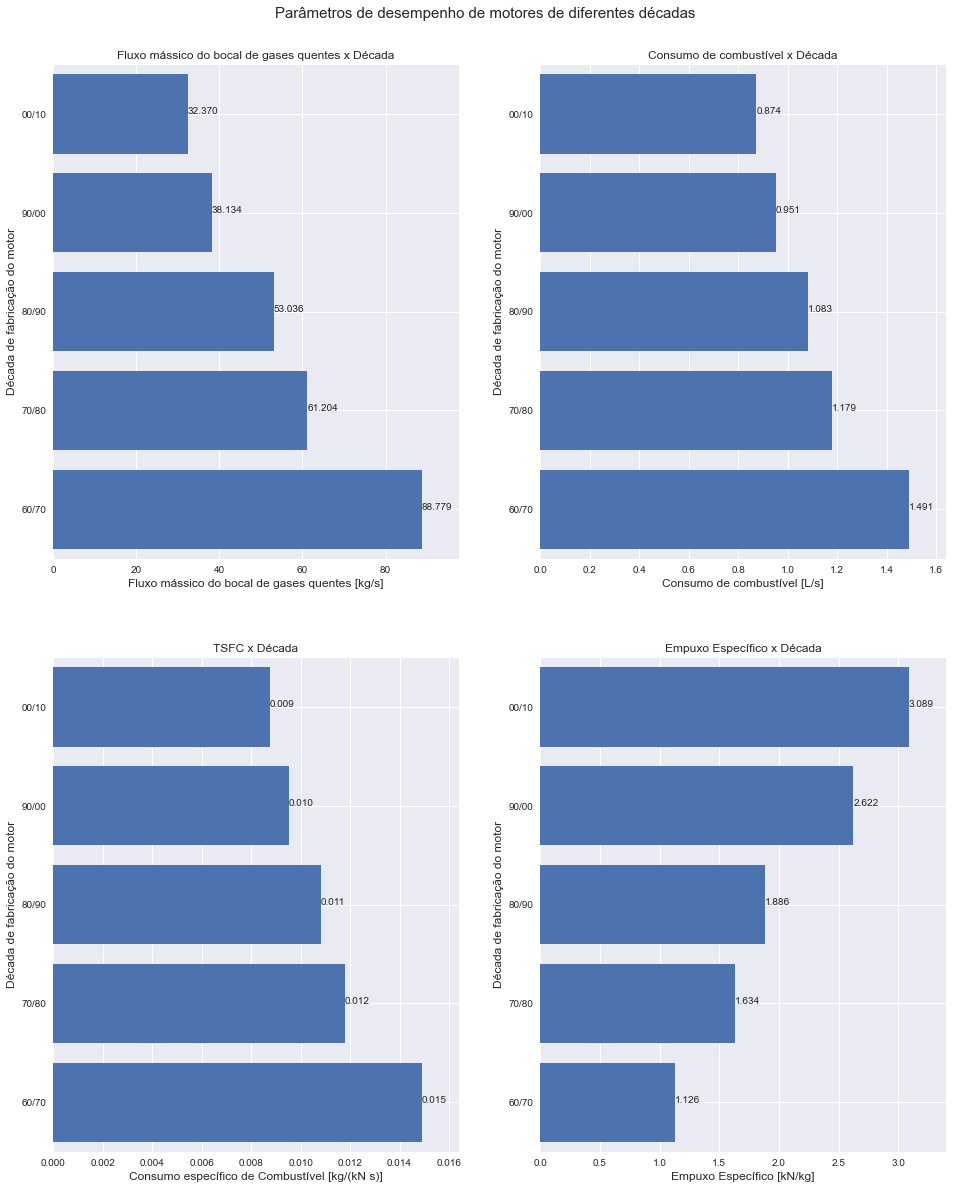

In [93]:
fontsize_label = 12 
fontsize_title = 15

aux=0
cols = 2
rows = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho de motores de diferentes décadas',fontsize=fontsize_title, y=0.92)#, fontsize=30)

# Definicão dos títulos e indices dos gráficos
titulos=['Fluxo mássico do bocal de gases quentes x Década','Consumo de combustível x Década','TSFC x Década','Empuxo Específico x Década']
ylabels=['Fluxo mássico do bocal de gases quentes [kg/s]','Consumo de combustível [L/s]','Consumo específico de Combustível [kg/(kN s)]','Empuxo Específico [kN/kg]']

for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        ax[i,j].set_ylabel('Década de fabricação do motor',fontsize=fontsize_label)
        ax[i,j].set_xlabel(ylabels[aux],fontsize=fontsize_label)
        bars = plt.barh(['60/70','70/80','80/90','90/00','00/10'],performance_results_q3.iloc[aux])
        #[xmin xmax ymin ymax]
        plt.axis([0, max(performance_results_q3.iloc[aux])*1.1,-0.5 , 4.5])
        plt.title(titulos[aux])
        for  bar in bars:
            width = bar.get_width()
            label_y = bar.get_y() + bar.get_height() / 2
            plt.text(width, label_y, s=f'{width:.3f}')
        aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemA.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

#### Análise dos dados

A partir dos dados é possível concluir que houve um aumento da eficiência na geração de empuxo ao modernizar os motores turbofan. Isso pode ser confirmado quando verificado que para um mesmo valor de empuxo (nesse exercício o empuxo total gerado foi de 100kN) menores valores de consumo de combustível específico e maiores valores do empuxo específico são obtidos a medida em que são analisados motores de décadas subsequentes.
 
Ademais é possível constatar a diminuição do fluxo mássico de gases quentes a medida que se avança em gerações subsequentes de motores turbofan. Que pode ser explicado pelos seguintes fatores:
- Aumento da razão de passagem é possibilitado um aumento na geração do empuxo sem a necessidade de aumento da vazão mássica que adentra o interior do motor; 
- Aumento da razão de pressão do compressor possibilitando que um menor fluxo mássico de ar de gases quentes seja capaz de produzir uma quantidade maior de empuxo.

### B) Variação da rotação do compressor na condição estática a nível do mar
Ainda na condição estática e ao nível do mar, varie a rotação até 70% de N2 e
compare como cada motor se comporta sobre os parâmetros de desempenho e
empuxo em valores absolutos e normalizados pela condição de 100% de N2.

#### Geração dos resultados 

Partindo dos valores de projeto definidos no item "a", foram variadas os valores de velocidade de rotação do compressor (N2) e os índices de desempenho de cada motor nessas condições foram avaliadas. A seguir são apresentados os gráficos contendo os resultados encontrados, tanto em valores absolutos quanto em valores normalizados. Essa normalização foi realizada tendo como referência os valores no ponto de projeto (N2 = 100%) calculados no item "a".

***Gráficos contendo os parâmetros de desempenho para motores***


In [94]:
# Instanciando novo dataframe a partir dos resultados para N2 = 100%
performance_results_3b = performance_results_q3.copy(deep=True)
performance_results_3b.loc['n2'] = [1,1,1,1,1]

In [95]:
performance_list= []
for i in np.linspace(1.0,0.7,10):
    # Setando nova rotação em n2
    turbofan_60.set_n2(i)
    turbofan_70.set_n2(i)
    turbofan_80.set_n2(i)
    turbofan_90.set_n2(i)
    turbofan_00.set_n2(i)

    # Atualizando o dataframe com novos resultados
    performance_results_3b['60/70'] = turbofan_60.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['70/80'] = turbofan_70.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['80/90'] = turbofan_80.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['90/00'] = turbofan_90.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['00/10'] = turbofan_00.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b.loc['n2']=[i,i,i,i,i]
    
    # Adicionando os resultados na listas de dataframes
    performance_list.append(performance_results_3b.copy(deep=True))

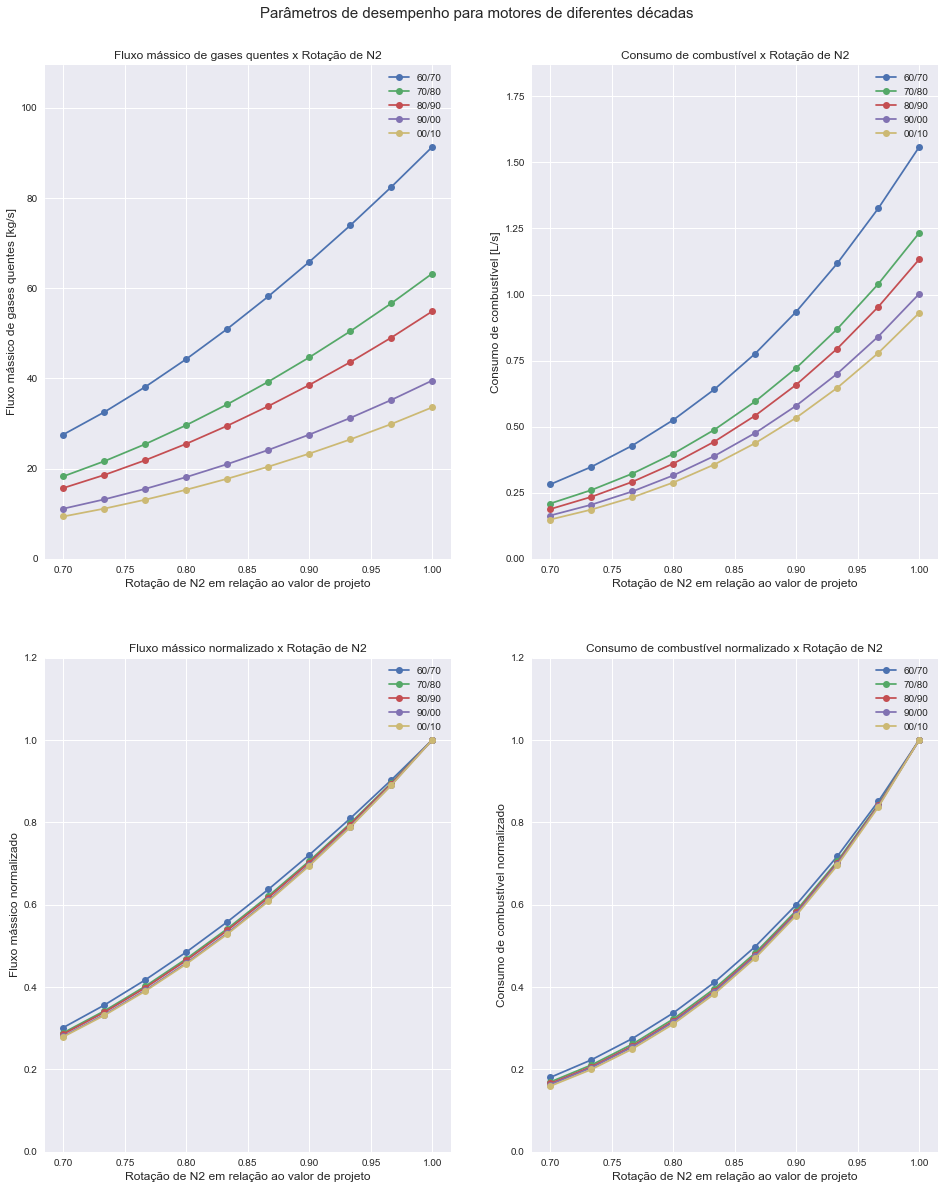

In [96]:
cols = 2
rows = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho para motores de diferentes décadas',fontsize=fontsize_title, y=0.92)#, fontsize=30)

# Definicão dos títulos e indices dos gráficos
titulos=['Fluxo mássico de gases quentes x Rotação de N2','Consumo de combustível x Rotação de N2','Fluxo mássico normalizado x Rotação de N2','Consumo de combustível normalizado x Rotação de N2']
ylabels=['Fluxo mássico de gases quentes [kg/s]','Consumo de combustível [L/s]','Fluxo mássico normalizado','Consumo de combustível normalizado']
labels = ['60/70','70/80','80/90','90/00','00/10']

aux = 0
i=0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*performance_list[0][labels[0]].iloc[aux])
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux])
    plt.legend()
    aux += 1
i = 1
aux = 0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux+2],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*performance_list[0][labels[0]].iloc[aux]/performance_list[0][labels[0]].iloc[aux])
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux+2])
    plt.legend()
    aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemB_1.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


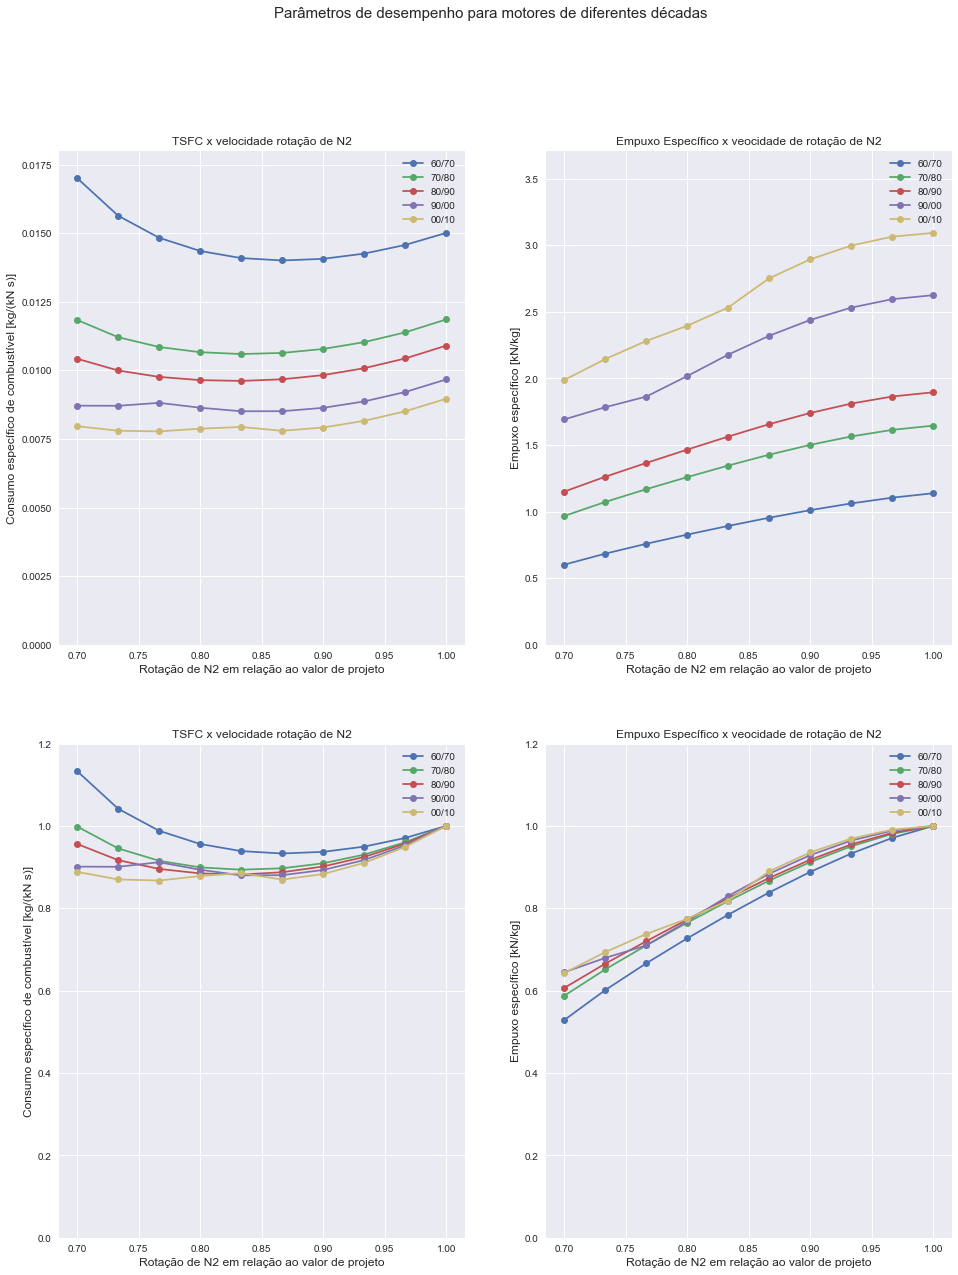

In [97]:
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho para motores de diferentes décadas',fontsize=fontsize_title)
# Definicão dos títulos e indices dos gráficos
titulos=['TSFC x velocidade rotação de N2','Empuxo Específico x veocidade de rotação de N2','TSFC normalizado x velocidade de rotação de N2','Empuxo Específico normalizado x velocidade de rotação de N2']
ylabels=['Consumo específico de combustível [kg/(kN s)]','Empuxo específico [kN/kg]','Consumo específico de combustível normalizado','Empuxo específico normalizado']
labels = ['60/70','70/80','80/90','90/00','00/10']

aux = 2
i=0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux-2],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*max(performance_list[0][labels[0]].iloc[aux], performance_list[0][labels[4]].iloc[aux]))
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux-2])
    plt.legend()
    aux += 1
i = 1
aux = 2
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux-2],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*performance_list[0][labels[0]].iloc[aux]/performance_list[0][labels[0]].iloc[aux])
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux-2])
    
    plt.legend()
    aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemB_2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

#### Análise dos resultados

A partir dos gráficos é possível verificar que conforme a rotação do compressor é diminuída, há uma menor vazão de ar quente no motor, visto que há uma relação diretamente proporcional entre a rotação do compressor e a quantidade de fluxo de ar que admite. Ademais, também é observada uma redução do consumo de combustível com a redução da rotação, a qual inclusive é mais acentuada do que a queda de vazão mássica de ar quente. Esta redução do consumo de combustível ocorre, primeiramente, por conta da redução da vazão mássica de ar quente no motor, que implica na diminuição da necessidade de injeção de combustível para ignitar o ar. Mas a redução do consumo de combustível também ocorre por questões de manutenção do motor: como o motor não está operando em máxima potência quando a rotação do compressor é reduzida, a câmara de combustão do motor não precisa operar na mesma temperatura em que opera na condição de rotação máxima, o que é desejável para que reduzir a danificação dos componentes da parte quente do motor; e para ter essa diminuição de temperatura, a razão ar/combustível precisa ser reduzida, o que implica na redução mais acelerada do consumo de combustível.

No que diz respeito à comparação entre diferentes gerações de motores, é possível perceber que os motores desenvolvidos nas décadas mais recentes apresentam uma melhora significativa na quantidade de fluxo de ar e de combustível consumido. Porém, o comportamento normalizado em função da diminuição de rotação é similar para todas as gerações, com uma certa vantagem para as gerações mais novas.

A partir do gráfico de consumo específico de combustível (TSFC) é observado um comportamento não-linear à medida que a variação de rotação do compressor. Nisto com a diminuição da rotação até cerca de 85% da rotação de N2 em ponto de projeto o parâmetro TSFC é levemente reduzido, mas ao diminuir ainda mais N2, ocorre o comportamento inverso com o aumento de TSFC. Isso pode ser explicado sabendo que a nas rotações próximas ao ponto de projeto operação do motor é mantida com uma eficiência praticamente constante, mas nos regimes de menor rotação, a eficiência do motor começa a ser comprometida, resultando na necessidade de maior TSFC.

E com o aumento do TSFC aliado à redução da razão combustível-ar, o empuxo específico (que consiste na divisão entre a razão combustível-ar e o TSFC) acaba sofrendo uma redução com a diminuição da rotação do compressor. Inicialmente, a rotações próximas do ponto de projeto, o empuxo específico, sofre menores reduções, visto que o TSFC praticamente não sofre alteração e, assim, não interfere na perda de empuxo específico. Porém, à medida que o TSFC vai sendo aumentado, uma vez que diminui-se a rotação N2, o empuxo específico passa a ter uma taxa de redução ainda mais acentuada.

Porém, para os modelos de motores turbofan que apresentam alta razão de passagem (B>5) são percebidos pontos de inflexão tanto no gráfico de empuxo específico x rotação de N2 quanto de TSFC x rotação de N2. Esses pontos revelam uma limitação no modelo para representar o comportamento de motores com alta razão de passagem. Ao qual está relacionada a diminuição da pressão no bocal de saída dos gases quentes chegando esta a ser menor que a pressão atmosférica o que resulta em valores de velocidade de saída do bocal de gases quentes não condizentes (valores NaN) com o observado fisicamente, assim se pode concluir para o motor da década de 2000-2010 os valores disponíveis nos gráficos são validos de 100% até 85% de N2 e para o motor da década de 1990/2000 existe validade dos dados de 100% até aproximadamente 80% de N2. 

Portanto comparando os motores de diferentes gerações, é possível notar que os motores desenvolvidos nas décadas mais recentes, são mais eficientes tanto no consumo de combustível (já que apresentam menor TSFC) e na geração de empuxo específico. Finalmente no que se refere ao TSFC, também é observado que os motores turbofan mais novos são capazes de se manter mais eficientes a velocidades de rotação do compressor mais baixas, o que é comprovado pelo menor aumento do TSFC.

### C) Parâmetros de desempenho a voo de cruzeiro
Pensando no voo de cruzeiro a Mach 0,85 e 12.200m ((Ta = 216,7K e Pa =
18,75 kPa) e que os motores operam a 85% de N2, calcule os parâmetros de
desempenho anteriores, somando-se a eles o empuxo gerado.

#### Geração dos resultados 

Nesse exercício manteve-se os valores de eficiências dos componentes do motor, de $\gamma$, da constantes do gás e poder calorífico do combustível  do item "a".

Porém para o cálculo dos parâmetros de desempenho nas condições estabelecidas foi realizada uma nova avaliação de operação dos motores a voo de cruzeiro (M=0.85, Ta=216,7 K e Pa= 18,75 kPa) e com uma rotação do compressor igual a 85% do valor de projeto.

Ademais foram atualizadas as vazões mássicas de ar para a altitude de 12.200 m. Dessa maneira são disponibilizados na tabela e gráficos seguintes os resultados obtidos:

In [109]:
values_60.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_70.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_80.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_90.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_00.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})

# Atualizando objetos com os valores do problema
turbofan_60 = mf.TurboFan(values_60)
turbofan_70 = mf.TurboFan(values_70)
turbofan_80 = mf.TurboFan(values_80)
turbofan_90 = mf.TurboFan(values_90)
turbofan_00 = mf.TurboFan(values_00)

# Setando a rotação de N2 para 85%
turbofan_60.set_n2(0.85)
turbofan_70.set_n2(0.85)
turbofan_80.set_n2(0.85)
turbofan_90.set_n2(0.85)
turbofan_00.set_n2(0.85)

In [110]:
# Inicializando dataframe do exercício 
performance_results_3c = performance_results_q3.copy(deep=True)

# Adicionando ao dataframe a linha relativa ao Empuxo total
performance_results_3c.loc['thrust_total'] = [0,0,0,0,0]

# Atualizando valores a partir da nova condição de voo
performance_results_3c['60/70'] = turbofan_60.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['70/80'] = turbofan_70.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['80/90'] = turbofan_80.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['90/00'] = turbofan_90.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['00/10'] = turbofan_00.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c.loc['n2'] = [0.85,0.85,0.85,0.85,0.85]

In [111]:
print(performance_results_3c.transpose().round(3).to_markdown())
# print(performance_results.transpose().round(3).to_latex())

|       |   hot_mass_flow |   fuel_consumption |   TSFC |   specific_thrust |   thrust_total |   n2 |
|:------|----------------:|-------------------:|-------:|------------------:|---------------:|-----:|
| 60/70 |          13.415 |              0.201 |  0.026 |             0.583 |          7.822 | 0.85 |
| 70/80 |           9.031 |              0.154 |  0.022 |             0.76  |          6.867 | 0.85 |
| 80/90 |           7.78  |              0.141 |  0.021 |             0.849 |          6.609 | 0.85 |
| 90/00 |           5.54  |              0.121 |  0.02  |             1.09  |          6.038 | 0.85 |
| 00/10 |           4.687 |              0.111 |  0.019 |             1.237 |          5.797 | 0.85 |


**Comparação entre os motores turbofan de diferentes décadas**
|  Década do motor     |   Vazão mássica de gases quentes [kg/s] |   Consumo de combustível [kg/s] |   TSFC [Kg/(kN s)] |   Empuxo Específico [(kN s)/kg] | Empuxo total [kN] | N2 |
|:------|----------------:|-------------------:|-------:|------------------:|---------------:|-----:|
| 60/70 |          13.415 |              0.201 |  0.026 |             0.583 |          7.822 | 0.85 |
| 70/80 |           9.031 |              0.154 |  0.022 |             0.76  |          6.867 | 0.85 |
| 80/90 |           7.78  |              0.141 |  0.021 |             0.849 |          6.609 | 0.85 |
| 90/00 |           5.54  |              0.121 |  0.02  |             1.09  |          6.038 | 0.85 |
| 00/10 |           4.687 |              0.111 |  0.019 |             1.237 |          5.797 | 0.85 |

***Gráficos contendo os parâmetros de desempenho***

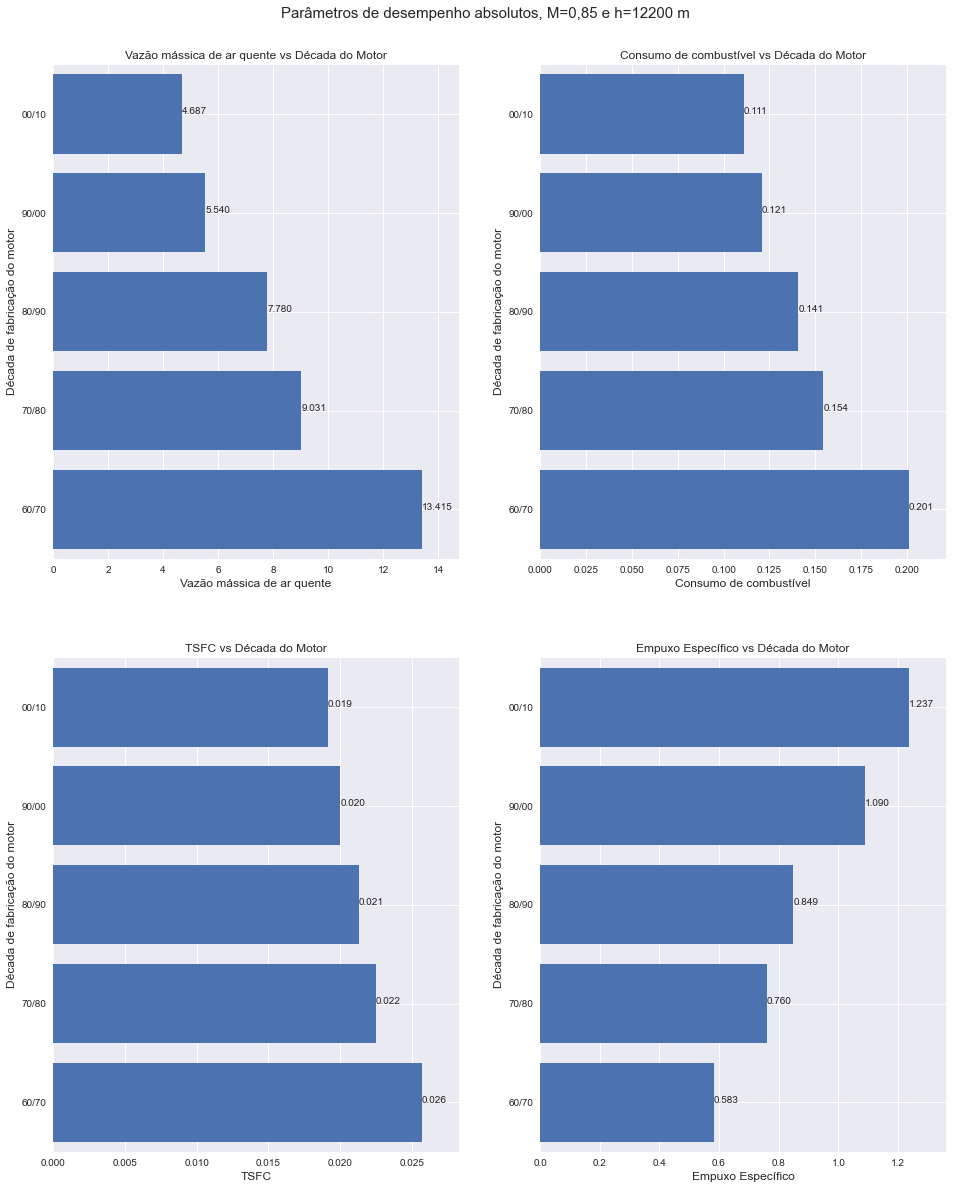

In [112]:
ylabels = ['Vazão mássica de ar quente', 'Consumo de combustível', 'TSFC', 'Empuxo Específico']
titulos = list(map(lambda x: x + " vs Década do Motor", ylabels))
aux=0
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho absolutos, M=0,85 e h=12200 m',fontsize=fontsize_title, y=0.92)#, fontsize=30)

for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        ax[i,j].set_ylabel('Década de fabricação do motor',fontsize=fontsize_label)
        ax[i,j].set_xlabel(ylabels[aux],fontsize=fontsize_label)
        bars = plt.barh(['60/70','70/80','80/90','90/00','00/10'],performance_results_3c.iloc[aux])
        #[xmin xmax ymin ymax]
        plt.axis([0, max(performance_results_3c.iloc[aux])*1.1,-0.5 , 4.5])
        plt.title(titulos[aux])
        for  bar in bars:
            width = bar.get_width()
            label_y = bar.get_y() + bar.get_height() / 2
            plt.text(width, label_y, s=f'{width:.3f}')
        aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemC_1.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

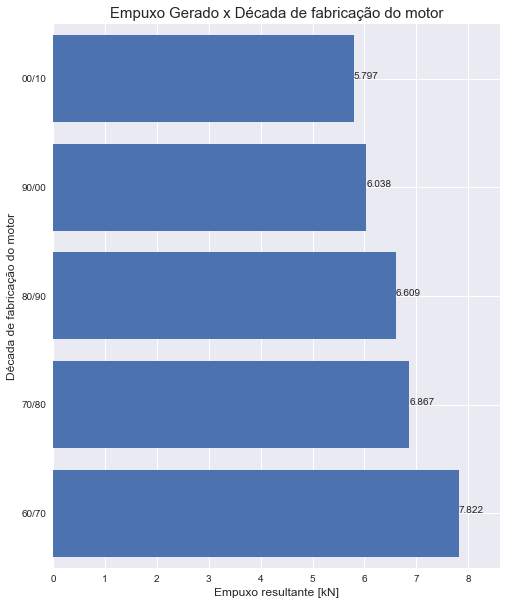

In [113]:
fig = plt.figure(figsize=(8,10))
bars = plt.barh(['60/70', '70/80', '80/90', '90/00', '00/10'],
                performance_results_3c.loc['thrust_total'])
plt.axis([0, max(performance_results_3c.loc['thrust_total'])*1.1, -0.5, 4.5])
for bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width:.3f}')

plt.title('Empuxo Gerado x Década de fabricação do motor', fontsize=fontsize_title)
plt.ylabel('Década de fabricação do motor', fontsize = fontsize_label)
plt.xlabel('Empuxo resultante [kN]', fontsize = fontsize_label)

fig.savefig('images/questao3/itemC_2.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

#### Análise dos resultados

Com o aumento da altitude de voo é possível identificar um aumento do TSFC e diminuição do empuxo específico, o que é consequência da queda de massa específica do ar e do fluxo de quantidade de movimento na entrada do motor (que é acrescido com a razão de passagem e velocidade de voo). Este último é diminuido do empuxo gerado pela exaustão dos gases nas saídas dos bocais.

A redução verificada na vazão mássica de gases quentes é consequência direta da diminuição da vazão da massa de ar que entra no motor que por sua vez é resultado da diminuição da massa específica do ar atmosférico em maiores altitudes. 

Similarmente ao verificado no item "a" ocorre a diminuição do consumo de combustível, uma vez que há menor necessidade de sua injeção na mistura ar-combustível.

Em relação ao empuxo gerado nas condições de vôo em cruzeiro é possível notar que há uma redução do seu valor quando comparado com o valor verificado em condições á nível do mar. Além disso os motores mais recentes necessitam gerar menos empuxo para manter a aeronave nas condições de vôo de cruzeiro o que corrobora com a maior eficiência de gerações mais novas de motores.


## Exercício 4: Operação dos Motores Turbo Hélice

* Camilla Santos
* Orlando Gabriel

# A)


### Calibração do Motor

Os dados considerados neste exercício são:

| Componente    | Eficiência Adiabática| $\gamma$            |
|---------------|----------------------|-------------------  |
| entrada do ar | 0,85                 | 1,40                |
| compressor    | 0,75                 | 1,37                |
| combustão     | 1,00                 | 1,35                |
| turbina       | 0.90                 | 1,33                |
| bocal         | 0,98                 | 1,36                |
| turbina livre | 0,90                 | 1,33                |


E os dados operacionais são:

| Dados operacionais:                           | Valor             |
|-----------------------------------------------|-------------------|
| Razão de Pressão no compressor                | 12                |
| Temperatura na sáida da câmara de combustão   | 1400 K            |
| Poder Calorífico Inferior do Combustível      | 45000 kJ/kg       |
| R Médio                                       | 288,3 m^2/(s^2.K) |
| Cp no combustor                               | 1,11 kJ/(kg.K)    |
| Cp na turbina livre                           | 1,11 kJ/(kg.K)    |
| Cp na turbina livre isentrópica               | 1,16 kJ/(kg.K)    |
| Razão de potência na caixa de redução         | 0,98              |
| Efiiciência da Hélice                         | 0,85              |

Inicialmente, o motor foi calibrado considerando os seguintes parâmetros:

| Dados operacionais:     | Valor     |
|-------------------------|-----------|
| Mach                    | 0 M       |
| Rotação N2              | 1         |
| Vazão de ar             | 6,7 kg/s  |
| Temperatura ambiente    | 288,2 K   |
| Pressão ambiente        | 101,3 kPa |

Para isso, como o único parâmetro que não foi informado foi a razão de expansão na turbina livre (pr_tl), este parâmetro foi determinado variando-o até que a potência obtida fosse a máxima fornecida pelo motor, ou seja, a maior potência termodinâmica que é igual à 1440 kW. Essa potência do motor corresponde às condições acima e não considera a potência limite da caixa de redução. No código, apenas a variável pr_tl que corresponde a essa razão de expansão foi variada de 0.0001 em 0.0001, desde o valor igual a 2 e até que a potência obtida fosse igual à 1440kW. A cada variação a potência obtida foi comparada com o valor de 1440 kW, logo foi obtida a razão de expansão na turbina livre que permite ao motor fornecer a potência de 1440kW dada as condições acima.

Razão de expansão na turbina livre:  2.3528000000007445


,1
BSFC,0.000091
EBSFC,0.000091
TSFC,0.053295
aircraft_speed,0.000000
fuel_consumption,0.131520
gearbox_power,1411.142568
mass_flow,6.735359
specific_power_turbine,213.788374
specific_thrust,0.366388
thrust_hot_air,2.467757


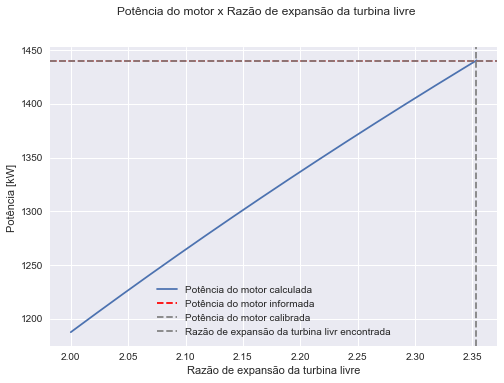

In [54]:
values = {
    'mass_flow': 6.7,  # Vazão mássica = vazão de ar no compressor [kg/s]
    't04': 1400,       # Temperatura da saída da câmara de combustão [K]
    'prc': 12,         # Razão de pressão do compressor
    'mach': 0,         # Mach de voo [M]
    'ta': 288.2,       # Temperatura ambiente [K]
    'pa': 101.3,       # Pressão ambiente [kPa]
    'n_d': 0.85,       # Eficiência da entrada de ar
    'gamma_d': 1.4,    # Gamma da entrada de ar
    'n_c': 0.75,       # Eficiência do compressor
    'gamma_c': 1.37,   # Gamma do compressor
    'n_b': 1,          # Eficiência da câmera de combustão
    'gamma_b': 1.35,   # Gamma da câmera de combustão
    'n_t': 0.9,        # Eficiência da turbina do compressor
    'gamma_t': 1.33,   # Gamma da turbina do compressor
    'n_tl': 0.9,       # Eficiência da turbina livre
    'gamma_tl': 1.33,  # Gamma da turbina livre
    'n_n': 0.98,       # Eficiência do bocal de gases quentes
    'gamma_n': 1.36,   # Gamma do bocal de gases quentes
    'pc_fuel': 45000,  # Poder calorífico inferior do combustível [kJ/kg]
    'cp_fuel': 1.110,  # Cp no combustor [kJ/(kg.K)]
    'cp_tls': 1.160,
    'cp_tl': 1.110,
    'r': 288.3,        # R médio m2/(s2.K)
    'pr_tl': 2.87,                # Razão de pressão da turbina livre    
    'gearbox_power_ratio': 0.98,     # Razão de potência da gearbox
    'propeller_efficiency': 0.85, # Eficiência da hélice
    }

# Para calibrar o motor inicialmente para permitir que a potência do motor produzida seja 1440 kW
turbine_power_target = 1440 #[kW]

turbine_pressure_ratio = 2.0
values["pr_tl"] = turbine_pressure_ratio
turbine_pressure_ratio_delta = 0.0001

turboprop = mf.TurboProp(values)
turboprop.set_n2(1)
performance_results = turboprop.sumarise_results()
results = {}

while (float(performance_results.loc['turbine_power']) < turbine_power_target):
    results[turbine_pressure_ratio] = float(performance_results.loc['turbine_power'])
    turbine_pressure_ratio = turbine_pressure_ratio + turbine_pressure_ratio_delta
    values["pr_tl"] = turbine_pressure_ratio
    turboprop = mf.TurboProp(values)
    turboprop.set_n2(1)
    performance_results = turboprop.sumarise_results()

turbine_pressure_ratio = turbine_pressure_ratio - turbine_pressure_ratio_delta
values["pr_tl"] = turbine_pressure_ratio
turboprop = mf.TurboProp(values)
turboprop.set_n2(1)
performance_results = turboprop.sumarise_results()
resp_performance_results = performance_results
turbine_power = float(performance_results.loc['turbine_power'])
# Build Graph
list_of_prtl = np.arange(turbine_pressure_ratio+turbine_pressure_ratio_delta, 
                        turbine_pressure_ratio+10*turbine_pressure_ratio_delta, 
                        turbine_pressure_ratio_delta)

for prtl in list_of_prtl:
    values["pr_tl"] = prtl
    turboprop = mf.TurboProp(values)
    turboprop.set_n2(1)
    results[prtl] = float(turboprop.sumarise_results().loc['turbine_power'])

fig4a1 = plt.figure()
fig4a1.suptitle("Potência do motor x Razão de expansão da turbina livre")
axis1 = fig4a1.add_subplot(111)
axis1.plot(results.keys(), results.values(), label = 'Potência do motor calculada')
axis1.set_ylabel("Potência [kW] ")
axis1.set_xlabel("Razão de expansão da turbina livre")
axis1.axhline(turbine_power_target, linestyle='--', color='red', label='Potência do motor informada')
axis1.axhline(turbine_power, linestyle='--', color='gray', label='Potência do motor calibrada')
axis1.axvline(turbine_pressure_ratio, linestyle='--', color='gray', label='Razão de expansão da turbina livr encontrada')
axis1.legend()

# save the plot as a file
fig4a1.savefig('images/questao4/calib_pt_tl.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

print("Razão de expansão na turbina livre: ", turbine_pressure_ratio)
resp_performance_results

Como o motor tinha sido calibrado em uma rotação de 100% e com essa rotação o motor fornece a potência máxima, a rotação do motor foi reduzida até que a potência fornecida pelo motor fosse menor ou igual à potência limite suportada pela caixa de redução, que é 1282 kW. Assim, no código e utilizando como razão de expansão da turbina livre o valor encontrado anteriormente, a variável N2, que representa a rotação entre 0 e 1, foi variada de 0.0001 em 0.0001. A cada variação a potência do motor foi comparada à potência limite da caixa de redução. E enquanto a potência do motor fosse maior do que a potência limite, a rotação N2 foi reduzida até que a potência do motor fosse menor ou igual à potência limite, obtendo assim o valor de rotação N2 com o qual o motor entrega a potência limite da caixa de redução.

Rotação:  0.963300000000004


,0.9633
BSFC,0.000088
EBSFC,0.000088
TSFC,0.063770
aircraft_speed,0.000000
fuel_consumption,0.113237
gearbox_power,1256.244434
mass_flow,6.281788
specific_power_turbine,204.063243
specific_thrust,0.282673
thrust_hot_air,1.775689


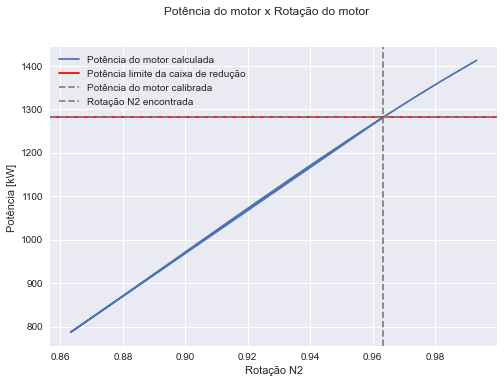

In [55]:
# Calibrar o motor para potência 1282kW
N2 = 1
N2_delta = 0.0001
turbine_power_target = 1282 #[kw]

# Get right simulation
values["pr_tl"] = turbine_pressure_ratio
turboprop.set_n2(N2)
turboprop = mf.TurboProp(values)
performance_results = turboprop.sumarise_results()

while(float(performance_results.loc['turbine_power']) > turbine_power_target):
    N2 = N2 - N2_delta
    turboprop.set_n2(N2)
    performance_results = turboprop.sumarise_results()

turbine_power = float(performance_results.loc['turbine_power'])

list_of_n2 = np.arange(N2-10*0.01, 1, 0.01)

for n2 in list_of_n2:
    turboprop.set_n2(n2)
    performance_result = turboprop.sumarise_results()
    performance_results[n2] = performance_result

fig4a2 = plt.figure()
fig4a2.suptitle("Potência do motor x Rotação do motor")
axis1 = fig4a2.add_subplot(111)
axis1.plot(performance_results.keys(), performance_results.loc['turbine_power'], label = 'Potência do motor calculada')
axis1.set_ylabel("Potência [kW] ")
axis1.set_xlabel("Rotação N2")
axis1.axhline(turbine_power_target, linestyle='-', color='red', label='Potência limite da caixa de redução')
axis1.axhline(turbine_power, linestyle='--', color='gray', label='Potência do motor calibrada')
axis1.axvline(N2, linestyle='--', color='gray', label='Rotação N2 encontrada')
axis1.legend()

# save the plot as a file
fig4a2.savefig('images/questao4/calib_N2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

print("Rotação: ", N2)
turboprop.set_n2(N2)
performance_result = turboprop.sumarise_results()
performance_result



# B)

### Flat rating

O ponto de Flat rating é o qual, dada uma temperatura ambiente e considerando que o motor fornece a potência limitada pela caixa de redução, é possível obter a temperatura na saída da câmara de combustão igual àquela estipulada para calibração do motor inicial, que neste caso é igual à 1400 K.

Assim para obter este ponto, no código, a temperatura ambiente foi variada de 0.1 em 0.1 partindo de 288.2K, sendo que para cada temperatura a rotação N2 foi variada encontrando a rotação que permite o motor fornecer a potência limitante de 1282 kW. Ao encontrar essa rotação também foi obtida a temperatura da saída de combustão, a qual foi comparada com a temperatura de 1400 K. O ponto de flat-rating, portanto, foi a temperatura ambiente para a qual obteve-se a temperatura de saída da câmara de combustão igual à 1400 K. 

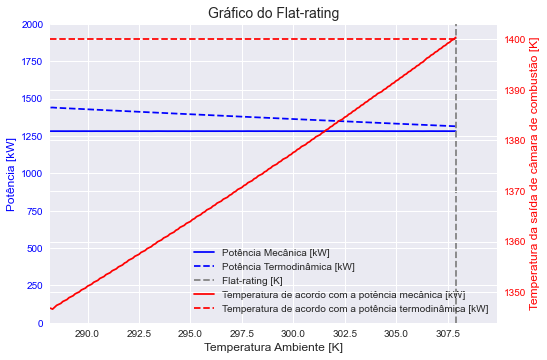

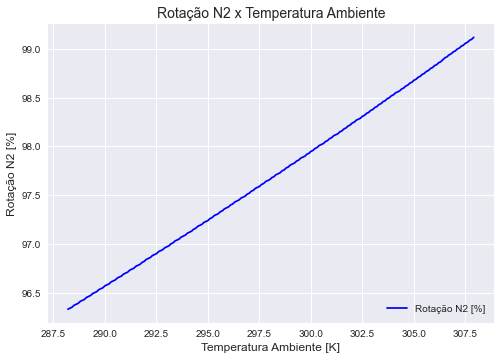

Temperatura do ponto de flat-rating:  307.90000000000447


,0.9913
BSFC,0.000087
EBSFC,0.000087
TSFC,0.070919
aircraft_speed,0.000000
fuel_consumption,0.111912
gearbox_power,1256.581801
mass_flow,6.208030
specific_power_turbine,206.543195
specific_thrust,0.254191
thrust_hot_air,1.578025


In [56]:
values = {
    'mass_flow': 6.7,  
    't04': 1400,       
    'prc': 12,         
    'mach': 0,         
    'ta': 288.2,       
    'pa': 101.3,       
    'n_d': 0.85,       
    'gamma_d': 1.4,    
    'n_c': 0.75,       
    'gamma_c': 1.37,   
    'n_b': 1,          
    'gamma_b': 1.35,   
    'n_t': 0.9,        
    'gamma_t': 1.33,   
    'n_tl': 0.9,       
    'gamma_tl': 1.33,  
    'n_n': 0.98,       
    'gamma_n': 1.36,   
    'pc_fuel': 45000,  
    'cp_fuel': 1.110,  
    'cp_tls': 1.160,
    'cp_tl': 1.110,  
    'r': 288.3,        
    'pr_tl': 2.3528,                    
    'gearbox_power_ratio': 0.98,  
    'propeller_efficiency': 0.85, 
    }

values['pr_tl'] = 2.3528    # Value found in 4a for Ta = 288.2K, N2 = 1, T04 = 1400K
T04_target = 1400           # Temperature T04 of operation ou 1417.668
N2 = 0.9633                 # Value found in 4a for Ta = 288.2K
N2_delta = 0.0001           # Delta N2
Ta = 288.2                  # Temperature Ta for ISA
Ta_delta = 0.1              # Delta Ta
turbine_power_target = 1282 # Limite of gearbox power

# Flags to break loops
found_flat_rating = False
found_N2_to_Ta = False

# Results
TAs = []
N2s = []

target = ['t04', 'BSFC', 't05', 'fuel_consumption', 'turbine_power']
target_op = ['t04', 'turbine_power']

values['ta'] = Ta
turboprop = mf.TurboProp(values)
results = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target])
results_op = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target_op])

index = 0

while not found_flat_rating:
    found_N2_to_Ta = False
    values['ta'] = Ta
    turboprop = mf.TurboProp(values)

    # Get result for Ta when N2 = 100%
    turboprop.set_n2(1)
    results_op[index] = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target_op])

    while not found_N2_to_Ta:
        N2 = N2 + N2_delta
        turboprop.set_n2(N2)
        performance_results = turboprop.sumarise_results()
        if float(performance_results.loc['turbine_power']) > turbine_power_target:
            found_N2_to_Ta = True
            N2 = N2 - N2_delta
        elif float(performance_results.loc['turbine_power']) == turbine_power_target:
            found_N2_to_Ta = True

    # Get result for Ta and N2 when mecanic power is 1282kW
    turboprop.set_n2(N2)
    results[index] = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target])
    TAs.append(Ta)
    N2s.append(N2)

    # When T04 calculated is equal to 1400K, so is flat rating
    if float(results[index].loc['t04']) >= T04_target:
        found_flat_rating = True
    else:
        Ta = Ta +Ta_delta # Update Ta

    # Update index of results
    index = index +1

results = results.loc[target]
results_op = results_op.loc[target_op]  

# Plot informations
'''
    Flat-rating Graph 
'''
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# set title
plt.title("Gráfico do Flat-rating",fontsize=14)
# make a plot
plot1, = ax.plot(TAs, results.iloc[4], color="blue", label='Potência Mecânica [kW]')
plot2, = ax.plot(TAs, results_op.iloc[1], 'b--', label='Potência Termodinâmica [kW]')
plot3 = ax.vlines(x = max(TAs), ymin= 0, ymax= 2000, color ='gray', linestyle='--', label='Flat-rating [K]')
# set x-axis label
ax.set_xlabel("Temperatura Ambiente [K]",fontsize=12)
# set y-axis label
ax.set_ylabel("Potência [kW]",color="blue",fontsize=12)
# set y-axis color
ax.tick_params(axis ='y', labelcolor = 'blue')
# set y-axis limits
ax.set_ylim(0,2000)

# set x-axis limits
ax.set_xlim(min(TAs),max(TAs)+2)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
plot4, = ax2.plot(TAs,  results.iloc[0], color="red", label='Temperatura de acordo com a potência mecânica [kW]')
plot5 = ax2.hlines(y = T04_target, xmin= min(TAs), xmax= max(TAs), color ='red', linestyle='--', label='Temperatura de acordo com a potência termodinâmica [kW]')

# set y-axis label
ax2.set_ylabel("Temperatura da saída de câmara de combustão [K]",color="red",fontsize=12)
# set y-axis color
ax2.tick_params(axis ='y', labelcolor = 'red')

# Add legends
ax.legend(handles=[plot1, plot2, plot3, plot4, plot5], loc='lower right')

# Show plot
plt.show()

# save the plot as a file
fig.savefig('images/questao4/flat_rating.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


'''
    N2 x Temperatura Ambiente Graph
'''
# create figure and axis objects with subplots()
fig2,ax = plt.subplots()
# set title
plt.title("Rotação N2 x Temperatura Ambiente",fontsize=14)
# make a plot
ax.plot(TAs, [x * 100 for x in N2s] , color="blue", label='Rotação N2 [%]')
# set x-axis label
ax.set_xlabel("Temperatura Ambiente [K]",fontsize=12)
# set y-axis label
ax.set_ylabel("Rotação N2 [%]",fontsize=12)
# Add legends
ax.legend(loc='lower right')

# Show plot
plt.show()

# save the plot as a file
fig2.savefig('images/questao4/rotacao_tempAmb.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

print("Temperatura do ponto de flat-rating: ", max(TAs))

performance_results

Analisando as potências apresentadas no gráfico Flat-rating, percebe-se que a medida que a temperatura ambiente aumenta, a potência termodinâmica, que é a potência máxima que o motor consegue fornecer para aquela temperatura ambiente a uma rotação em 100%, diminui. Isso ocorre devido à necessidade de manter a temperatura na saída da câmara de combustão máxima constante, dado que a temperatura ambiente aumenta. Para isso, é injetado menos combustível, o que faz com que a potência diminua. Enquanto isso, a potência mecânica observada, que é a potência efetiva que o motor entrega, é limitada à potência máxima suportada pela caixa de redução. 

Visto que a potência térmodinâmica do motor cai, a medida que a temperatura ambiente aumenta, é necessário uma maior rotação para obter a potência máxima suportada pela caixa de redução, o que é observado no gráfico Rotação N2 x Temperatura Ambiente.

Como a rotação aumenta a medida que a temperatura ambiente aumenta, a temperatura na saída da câmara de combustão também aumenta até o ponto de flat-rating, em que se alcança essa temperatura igual à 1400K. No gráfico de flat-rating observa-se que neste ponto a máxima potência termodinâmica possível dada aquelas condições não é igual à potência efetiva entregue a caixa de redução, pois a rotação neste ponto não é a máxima possível.

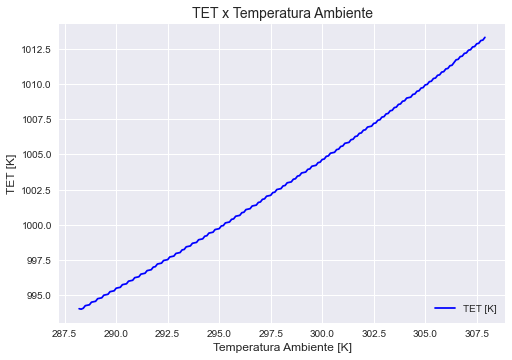

In [57]:
'''
    TET x Temperatura Ambiente Graph
'''
# create figure and axis objects with subplots()
fig4,ax = plt.subplots()
# set title
plt.title("TET x Temperatura Ambiente",fontsize=14)
# make a plot
ax.plot(TAs, results.iloc[2], color="blue", label='TET [K]')
# set x-axis label
ax.set_xlabel("Temperatura Ambiente [K]",fontsize=12)
# set y-axis label
ax.set_ylabel("TET [K]",fontsize=12)

# Add legends
ax.legend(loc='lower right')

# Show plot
plt.show()

# save the plot as a file
fig4.savefig('images/questao4/TET_tempAmb.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


Como a temperatura na saída da câmara de combustão aumenta com o aumento da rotação e as temperaturas da entrada e saída do compressor também aumenta devido ao aumento da temperatura ambiente, a temperatura entre turbinas também aumenta.

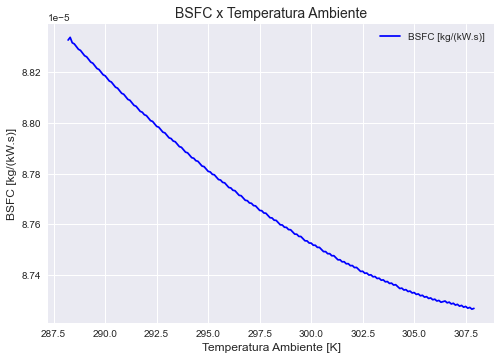

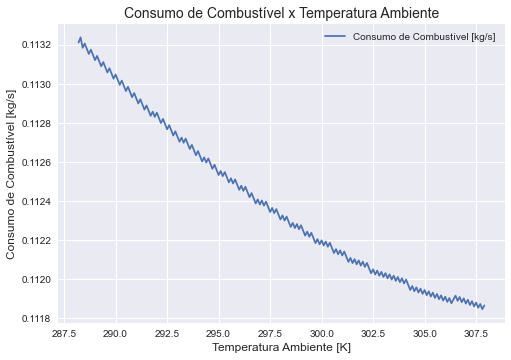

In [58]:
'''
    BSFC x Temperatura Ambiente Graph 
'''
# create figure and axis objects with subplots()
fig3,ax = plt.subplots()
# set title
plt.title("BSFC x Temperatura Ambiente",fontsize=14)
# make a plot
ax.plot(TAs, results.iloc[1], color="blue", label='BSFC [kg/(kW.s)]')
# set x-axis label
ax.set_xlabel("Temperatura Ambiente [K]",fontsize=12)
# set y-axis label
ax.set_ylabel("BSFC [kg/(kW.s)]",fontsize=12)

# Add legends
ax.legend(loc='upper right')

# Show plot
plt.show()

# save the plot as a file
fig3.savefig('images/questao4/BSFC_tempAmb.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

'''
    Consumo de Combustível x Temperatura Ambiente Graph
'''
# create figure and axis objects with subplots()
fig5,ax = plt.subplots()
# set title
plt.title("Consumo de Combustível x Temperatura Ambiente",fontsize=14)
# make a plot
ax.plot(TAs, results.iloc[3], label='Consumo de Combustível [kg/s]')
# set x-axis label
ax.set_xlabel("Temperatura Ambiente [K]",fontsize=12)
# set y-axis label
ax.set_ylabel("Consumo de Combustível [kg/s]",fontsize=12)

# Add legends
ax.legend(loc='upper right')

# Show plot
plt.show()

# save the plot as a file
fig5.savefig('images/questao4/consComb_tempAmb.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


Para manter a temperatura da saída da câmara de combustão máxima constante, a injeção de combustível vai diminuindo, devido ao aumento da temperatura ambiente que, por sua vez, aumenta a temperatura na entrada e saída do compressor. Assim, o BSFC e o consumo de combustível também diminuem.

# C)

Primeiramente deve-se alterar as condições de entrada, adotando-se uma altitude de 7000 m (Pa = 45 kPa e Ta = 246,55 K).

In [59]:
values = {
    'mass_flow': 6.7,  # Vazão mássica = vazão de ar no compressor [kg/s]
    't04': 1400,       # Temperatura da saída da câmara de combustão [K]
    'prc': 12,         # Razão de pressão do compressor
    'mach': 0,         # Mach de voo [M]
    'ta': 288.2,       # Temperatura ambiente [K]
    'pa': 101.3,       # Pressão ambiente [kPa]
    'n_d': 0.85,       # Eficiência da entrada de ar
    'gamma_d': 1.4,    # Gamma da entrada de ar
    'n_c': 0.75,       # Eficiência do compressor
    'gamma_c': 1.37,   # Gamma do compressor
    'n_b': 1,          # Eficiência da câmera de combustão
    'gamma_b': 1.35,   # Gamma da câmera de combustão
    'n_t': 0.9,        # Eficiência da turbina do compressor
    'gamma_t': 1.33,   # Gamma da turbina do compressor
    'n_tl': 0.9,       # Eficiência da turbina livre
    'gamma_tl': 1.33,  # Gamma da turbina livre
    'n_n': 0.98,       # Eficiência do bocal de gases quentes
    'gamma_n': 1.36,   # Gamma do bocal de gases quentes
    'pc_fuel': 45000,  # Poder calorífico inferior do combustível [kJ/kg]
    'cp_fuel': 1.110,  # Cp no combustor [kJ/(kg.K)]  
    'cp_tls': 1.160,
    'cp_tl': 1.110, 
    'r': 288.3,         # R médio m2/(s2.K)
    'pr_tl': 2.3528,    # Razão de pressão da turbina livre    
    'gearbox_power_ratio': 0.98,  # Razão de potência da gearbox
    'propeller_efficiency': 0.85, # Eficiência da hélice
    }


## INICIO DA QUESTÃO 4 - LETRA C ##

#Atualização de values para a letra c
values["pa"] = 45
values["ta"] = 246.55

Em seguida, deve-se variar os valores de número de Mach (0.25, 0.35 e 0.45), alterando-se valores de rotação do gerador de gás (entre 65% e 100% do valor nominal máximo), para cada valor de Mach.

In [60]:
#Variáveis procuradas (alvos) e suas unidades
target = ['thrust_propeller', 'thrust_hot_air', 'thrust_total', 'BSFC', 'EBSFC', 'TSFC', 'fuel_consumption']
target_title = ['Empuxo produzido pela hélice', 'Empuxo produzido pelo Bocal', 'Empuxo produzido total', 'BSFC', 'EBSFC', 'TSFC', 'Consumo de combustível']
target_ylabel = ['Empuxo [kN]', 'Empuxo [kN]', 'Empuxo [kN]', 'BSFC [kg/(kW.s)]', 'EBSFC [kg/(kW.s)]', 'TSFC [kg/(kN.s)]', 'Consumo de combustível [kg/s]']

#valores de mach utilizados
mach = [0.25, 0.35, 0.45]

#laço variando os valores de mach
for i in mach:

    values["mach"] = i

    turboprop = mf.TurboProp(values)
    performance_results = turboprop.sumarise_results()
    results = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target])

    # laço variando os valores de N2
    for j in np.linspace(1.0, 0.65, 20):

        turboprop.set_n2(j)
        results[j] = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target])

    results = results.loc[target]

    # alocando os resultados para cada mach (para plotar posteriormente)
    if i==mach[0]:

        results1 = results
    
    elif i==mach[1]:

        results2 = results

    elif i==mach[2]:

        results3 = results


Por fim, deve-se plotar os gráficos, mostrando-se a relação entre os parâmetros específicos e os valores de N2, para cada valor de Mach.

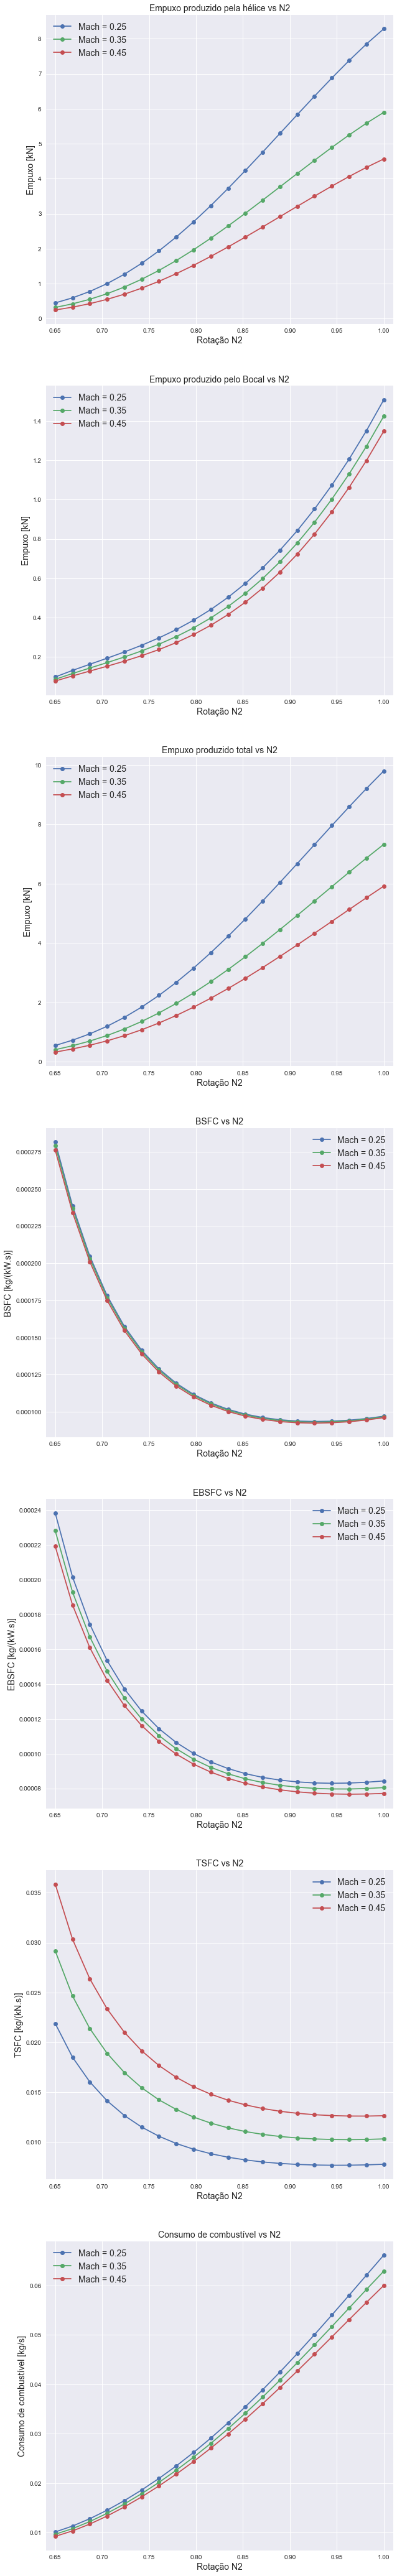

In [61]:
#plot dos graficos
fontsize=14
cols = 1
rows= 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10,75))
aux=0

for i in range(0,rows):

    for j in range(0,cols):

        plt.sca(ax[i])
        plt.plot(results1.iloc[aux], marker='o', label="Mach = " + str(mach[0]))
        plt.plot(results2.iloc[aux], marker='o', label="Mach = " + str(mach[1]))
        plt.plot(results3.iloc[aux], marker='o', label="Mach = " + str(mach[2]))
        plt.title(target_title[aux]+" vs N2", fontsize=fontsize)
        plt.xlabel('Rotação N2', fontsize=fontsize)
        plt.ylabel(target_ylabel[aux], fontsize=fontsize)
        plt.xlim([0.64,1.01])
        plt.legend(fontsize=fontsize)
        aux += 1


# RELATÓRIO TÉCNICO

In [62]:
!jupyter nbconvert --to html caderno_curso_examplos.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="{'remove_cell'}" --TagRemovePreprocessor.remove_input_tags="{'remove_input'}"

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
